In [1]:
#import standard libraries

import numpy as np
import matplotlib.pyplot as plt
import pyblock
from pymbar import timeseries

In [2]:
job_name = '50558343'                           # '50557478', '50558343', '50559635'
data_dir = '/Volumes/_work/genius/scratch/'

3.0 0.0
Temperature: 1.0321217070290984 +/- 4.4805938198550975e-05
Predicted dissipative viscosity: 0.16156762218461793
Dissipative viscosity: 0.16264119165147442 +/- 0.0059359594880497
Kinetic viscosity: 1.1898648361576605 +/- 0.0016983853877391983
Total viscosity: 1.1898648361576605 +/- 0.0016983853877391983


4.0 0.0
Temperature: 1.0316430746875689 +/- 4.271580319454443e-05
Predicted dissipative viscosity: 0.28723132832820963
Dissipative viscosity: 0.2782149563230146 +/- 0.007879881490458311
Kinetic viscosity: 1.1881076267677 +/- 0.001899355716405268
Total viscosity: 1.1881076267677 +/- 0.001899355716405268


5.0 0.0
Temperature: 1.0313721018085282 +/- 3.8799687901863265e-05
Predicted dissipative viscosity: 0.4487989505128276
Dissipative viscosity: 0.39541275075014365 +/- 0.010068961295383736
Kinetic viscosity: 1.1818225882502524 +/- 0.002062201946674561
Total viscosity: 1.1818225882502524 +/- 0.002062201946674561


6.0 0.0
Temperature: 1.0310813956843685 +/- 3.891000252779132e-05
P

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Temperature: 1.0300622233794896 +/- 4.355627100890857e-05
Predicted dissipative viscosity: 0.16156762218461793
Dissipative viscosity: 0.1054170600995972 +/- 0.005167386877456631
Kinetic viscosity: 0.034408036193141665 +/- 0.0013146629254603165
Total viscosity: 2.043008096896591 +/- 0.0034292428832461267


4.0 100.0
Temperature: 1.0297206959901057 +/- 3.705672787862347e-05
Predicted dissipative viscosity: 0.28723132832820963
Dissipative viscosity: 0.20550087114553697 +/- 0.007405021605230902
Kinetic viscosity: 0.11226064327991282 +/- 0.0015685255062909227
Total viscosity: 2.413007189522988 +/- 0.004028854925982056


5.0 100.0
Temperature: 1.0294606733650071 +/- 3.5652867377312624e-05
Predicted dissipative viscosity: 0.4487989505128276
Dissipative viscosity: 0.3916147869403103 +/- 0.009778859509808044
Kinetic viscosity: 0.1667436079638091 +/- 0.0018267845049532066
Total viscosity: 2.7511303346196527 +/- 0.004803015518262288


6.0 100.0
Temperature: 1.0292779601025568 +/- 3.49031190556880

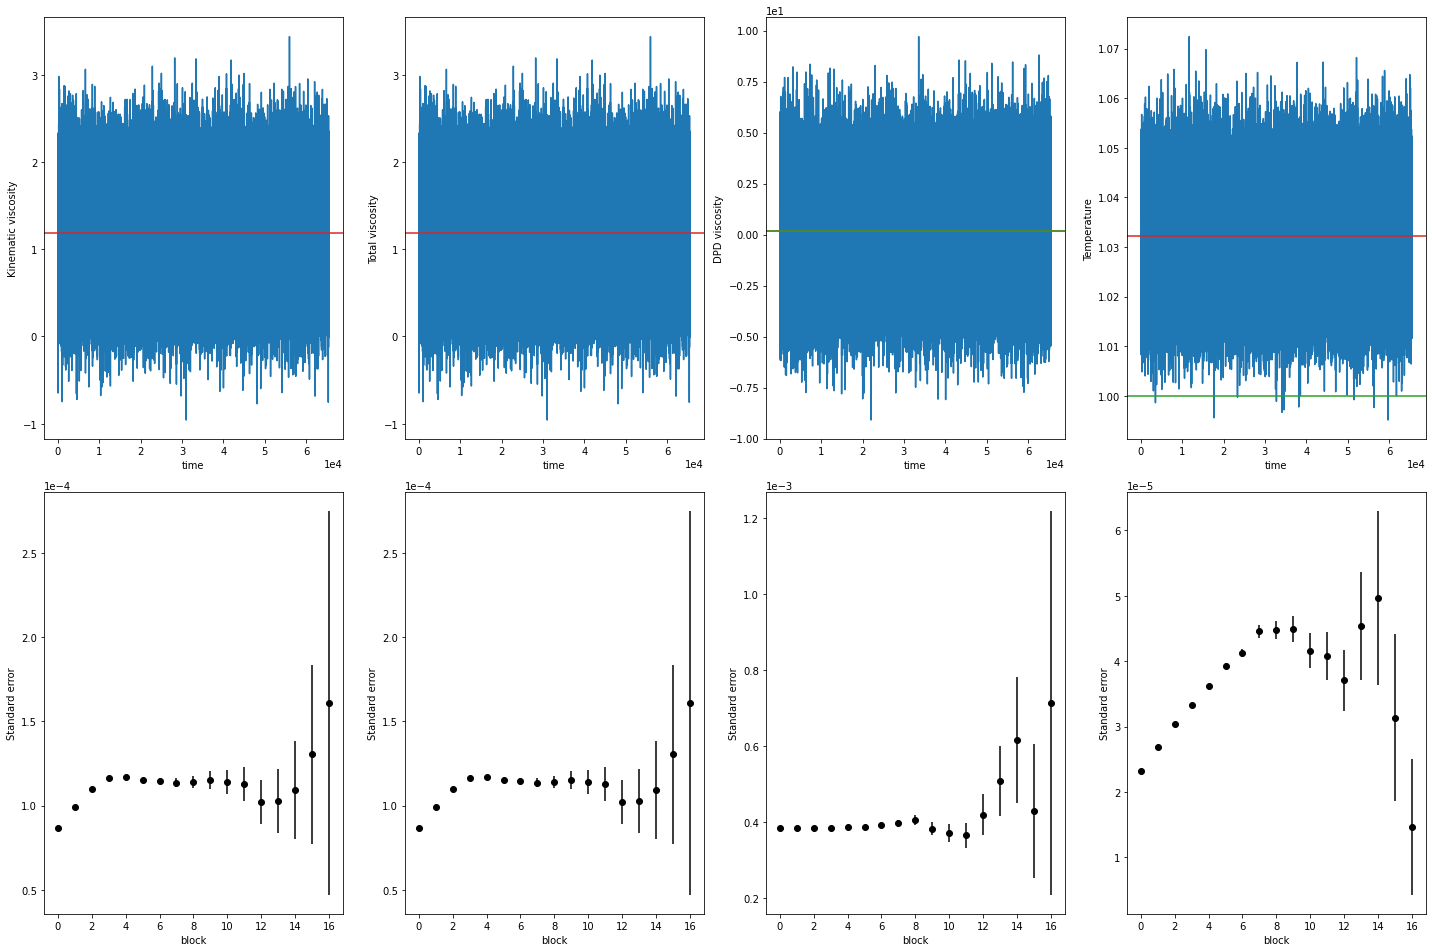

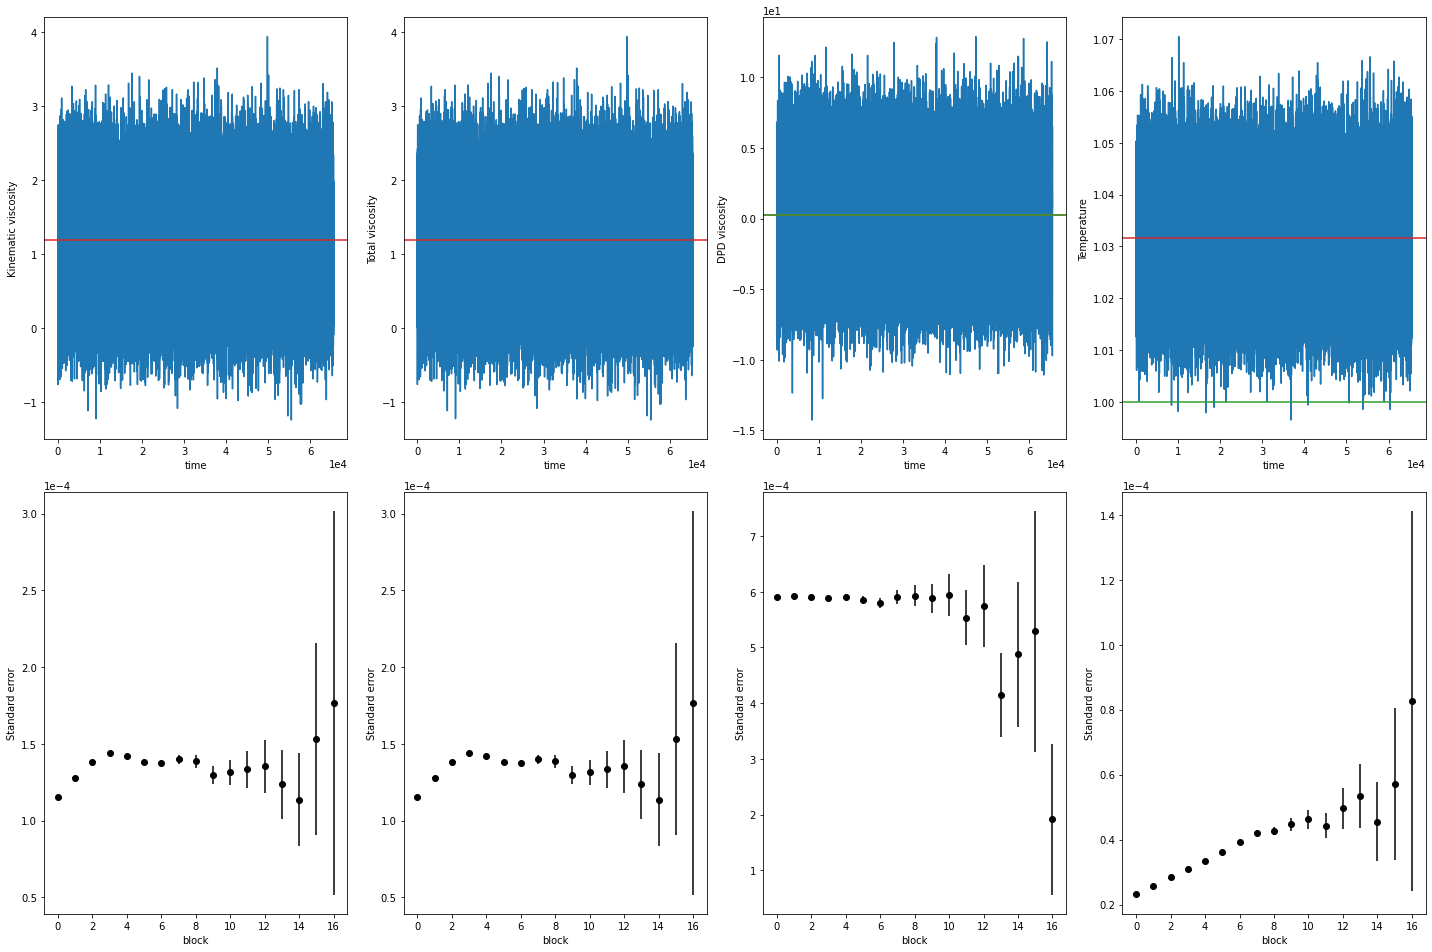

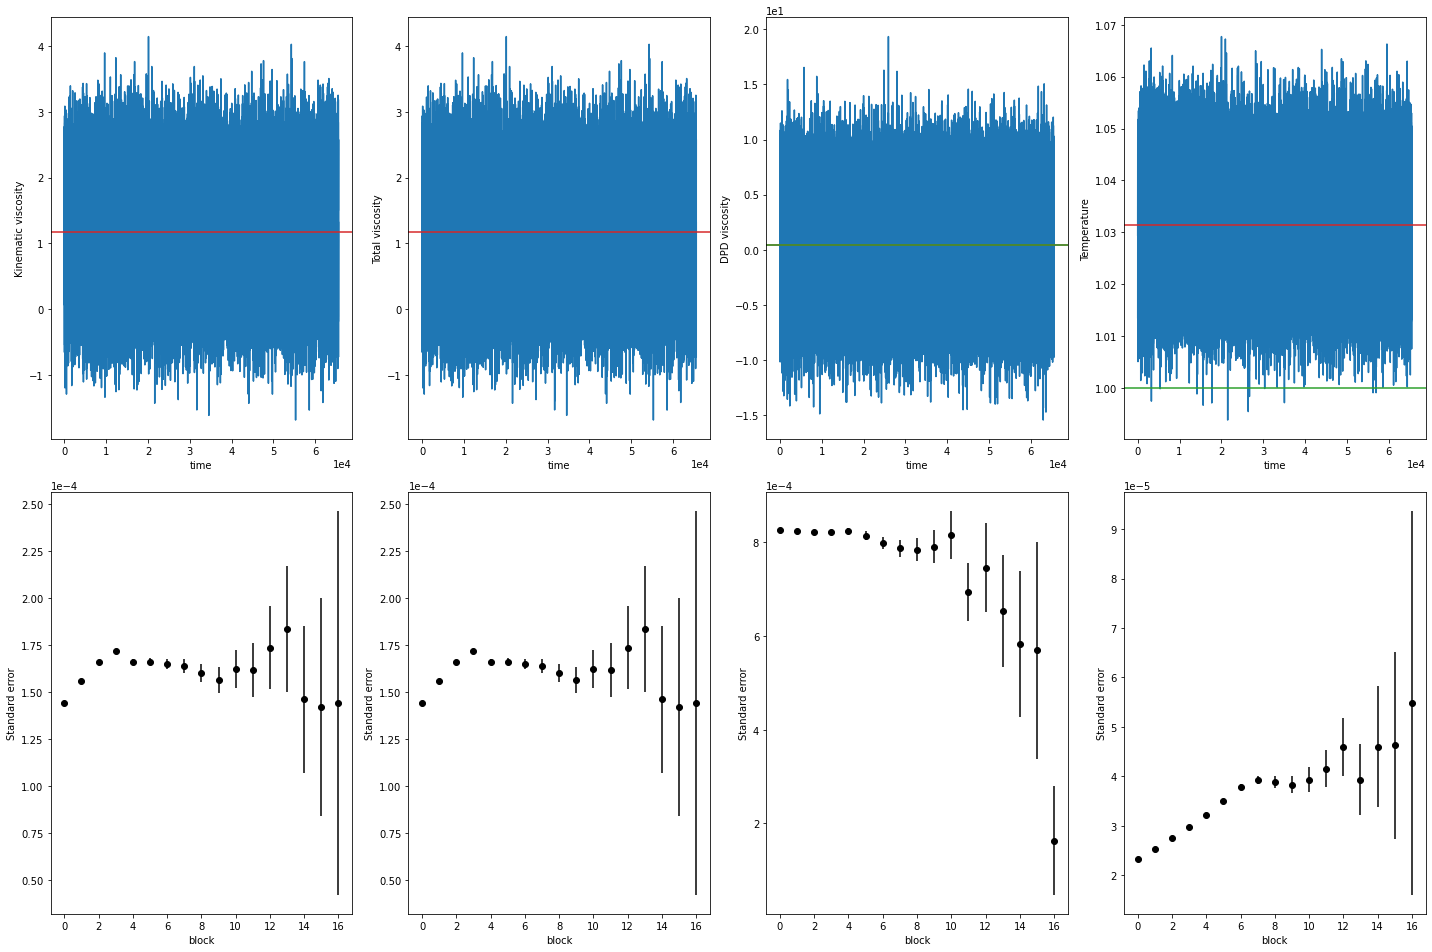

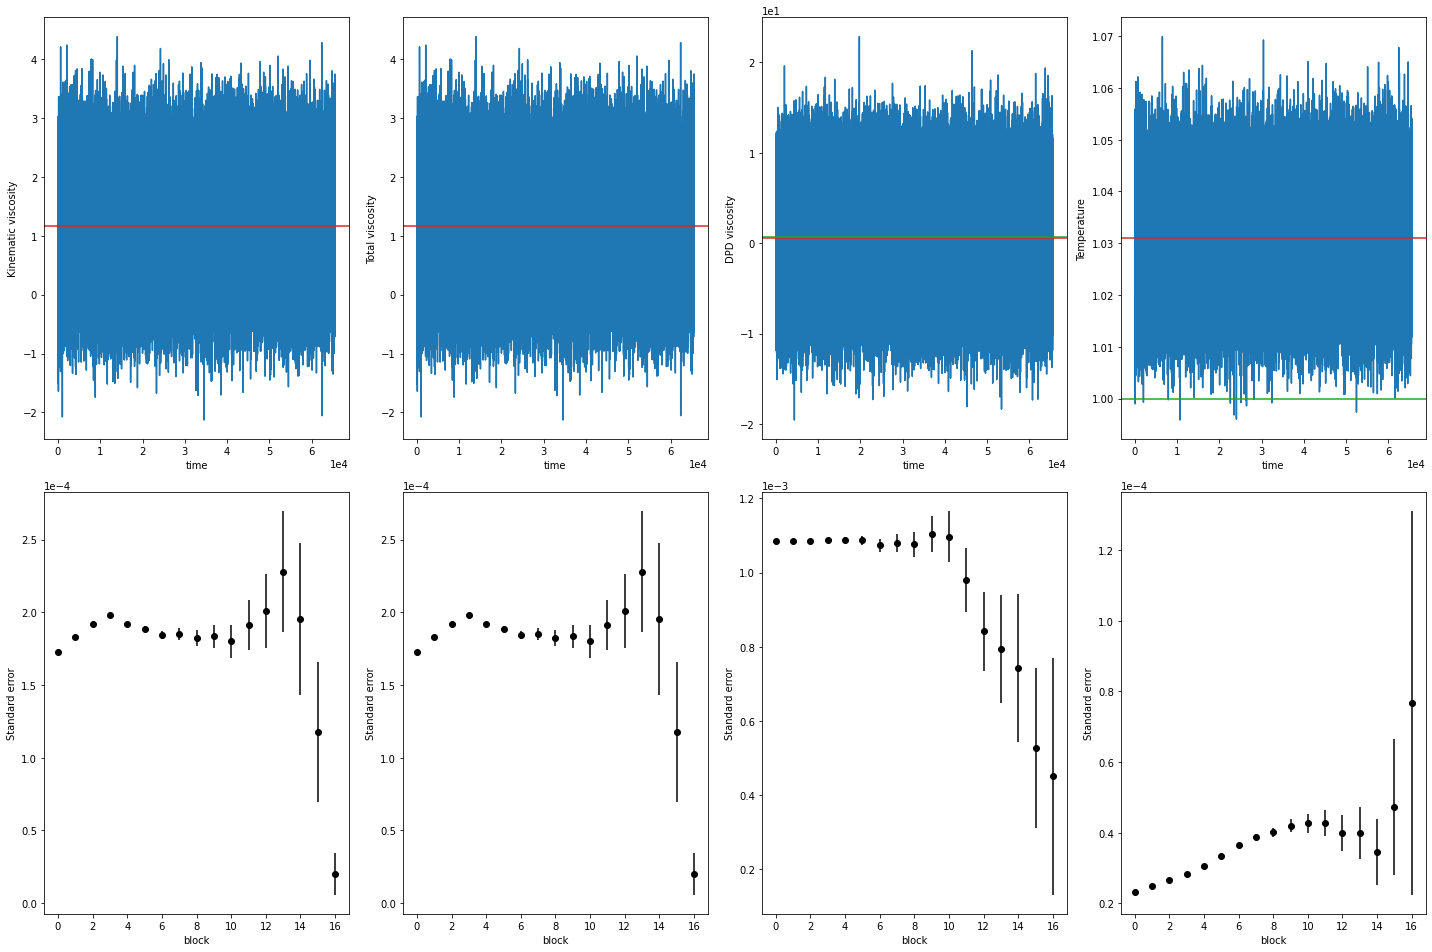

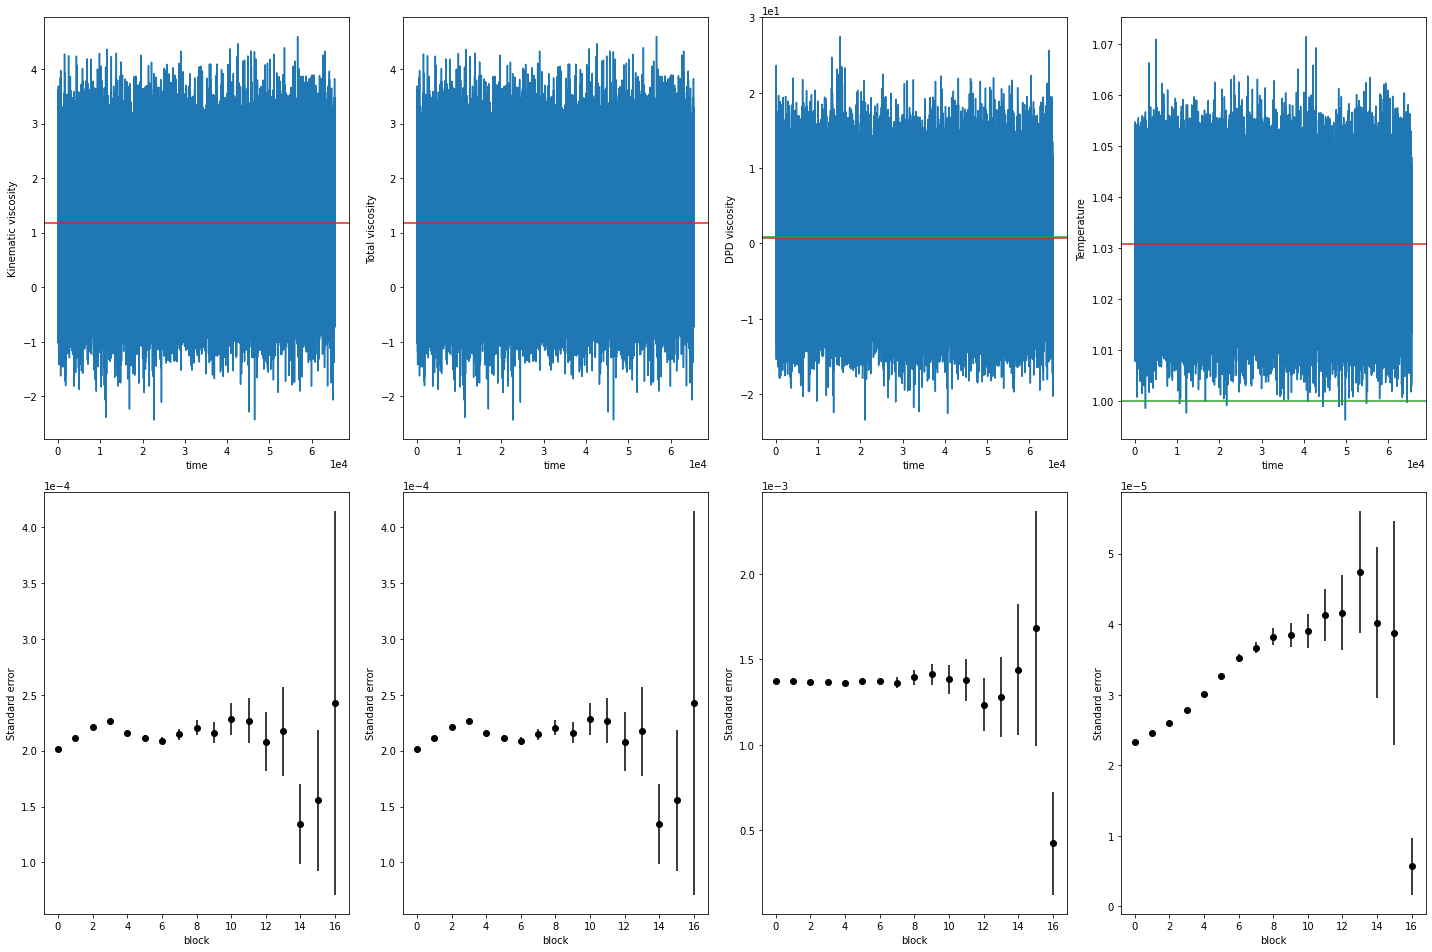

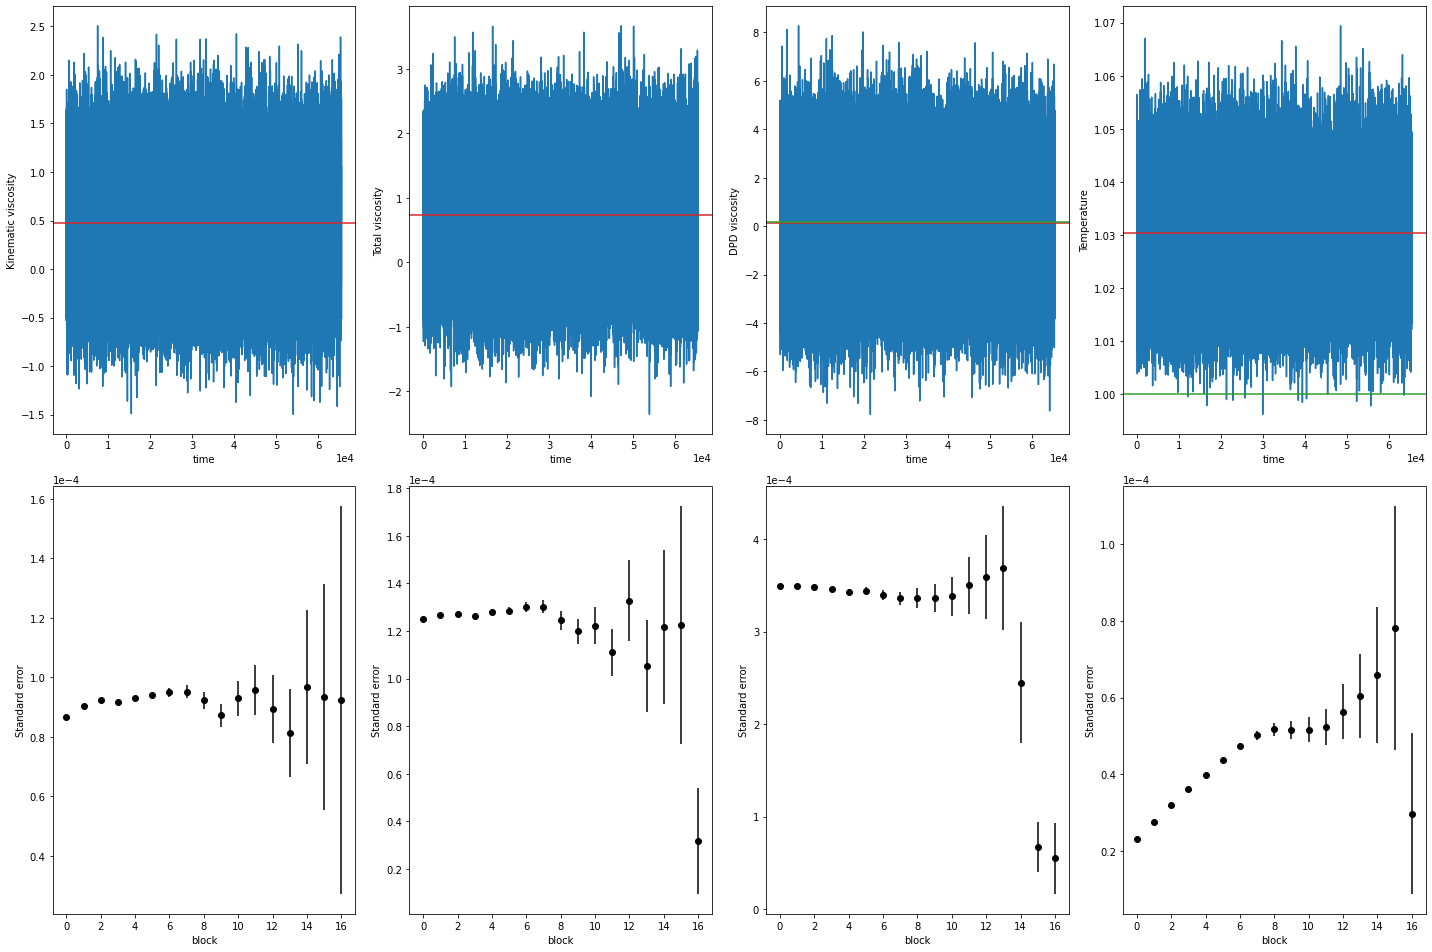

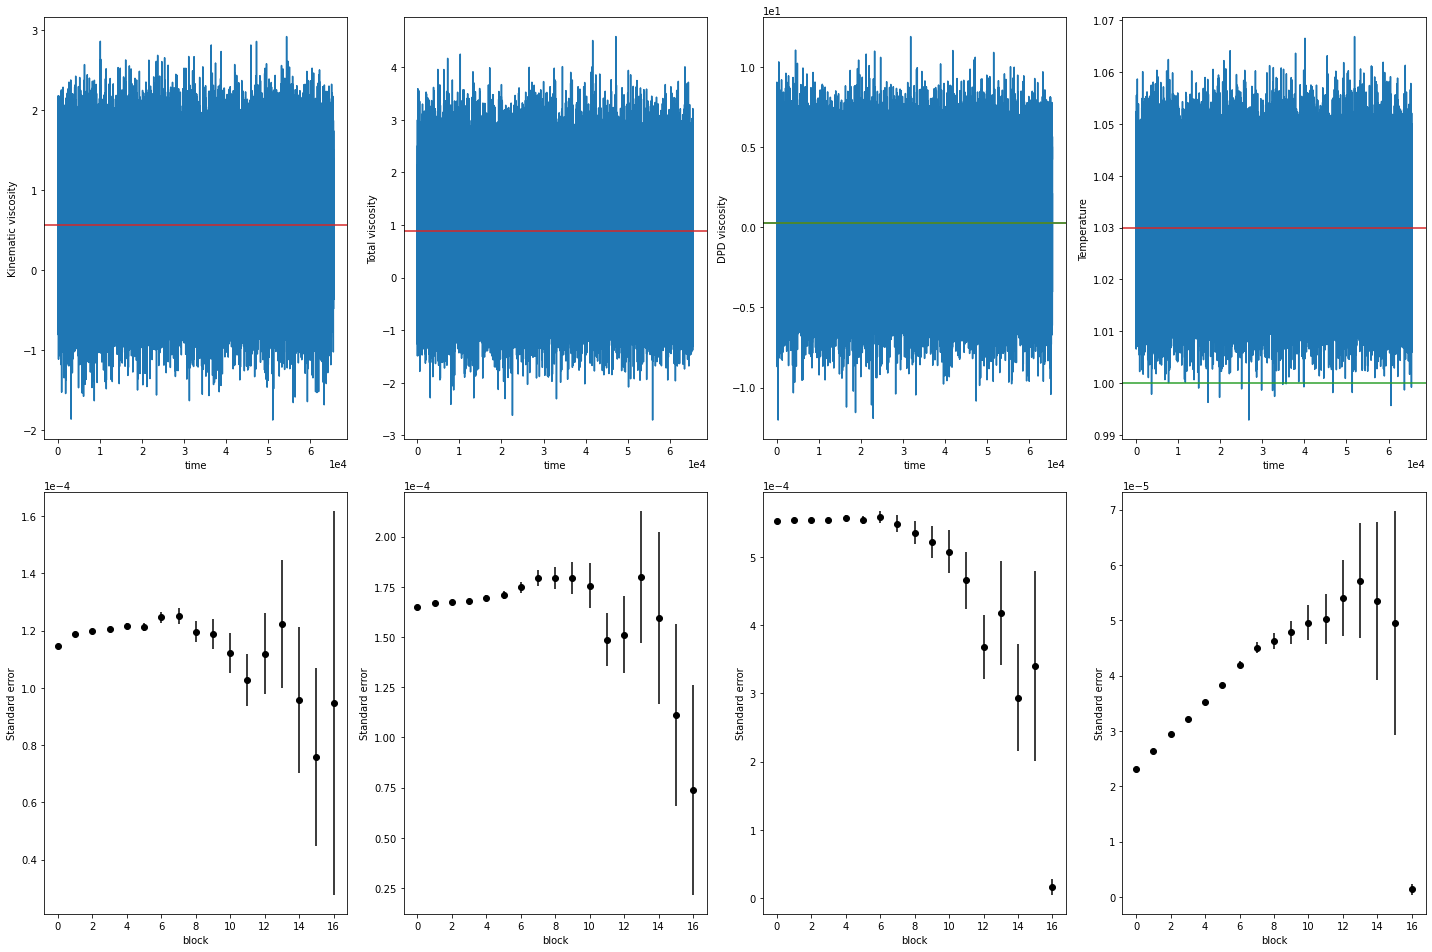

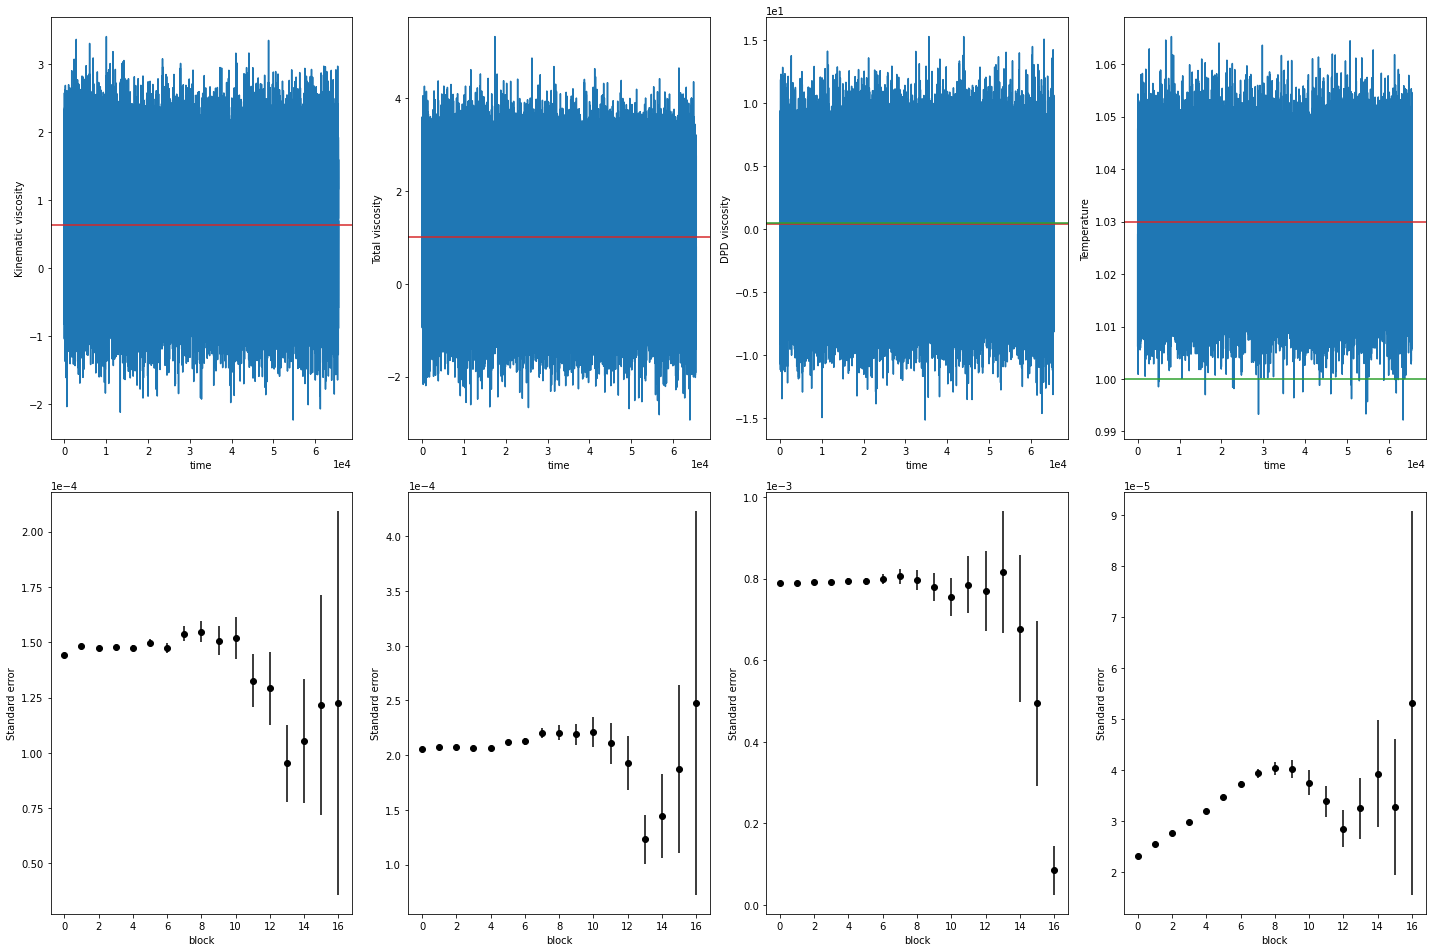

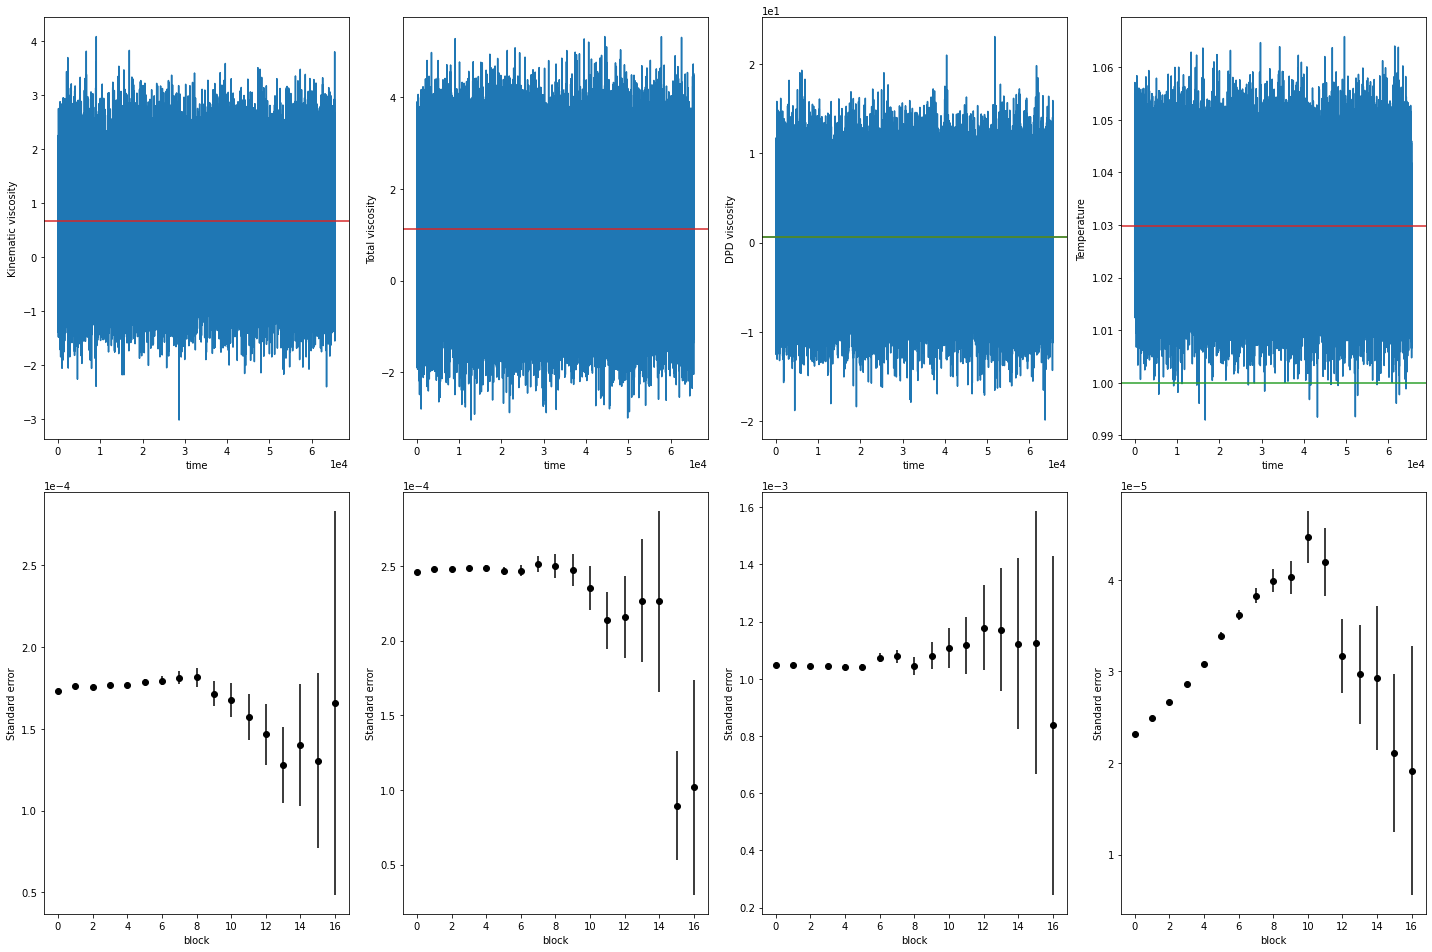

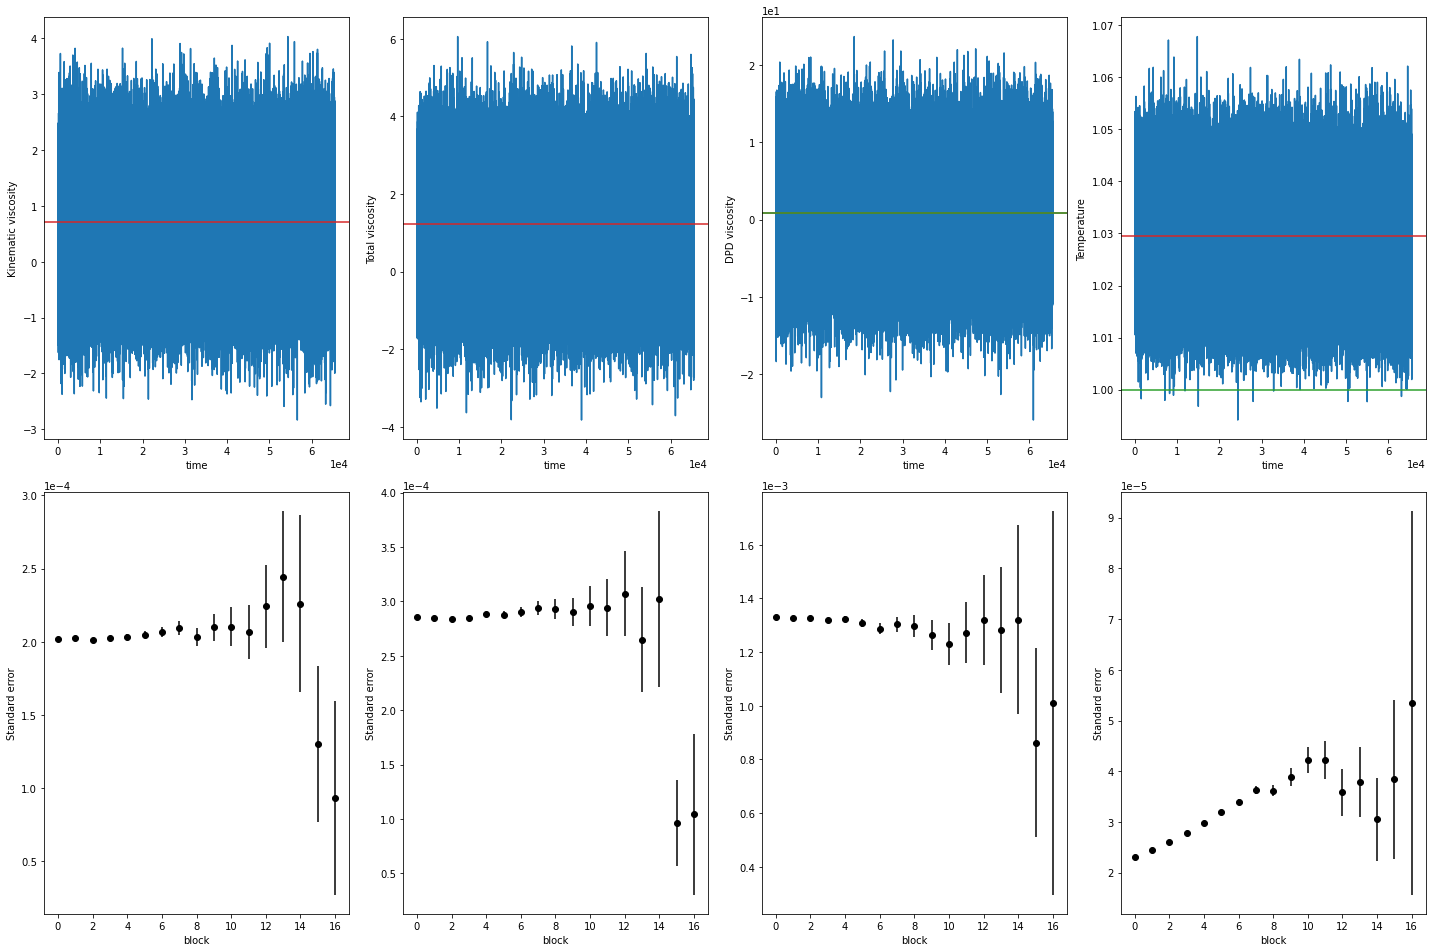

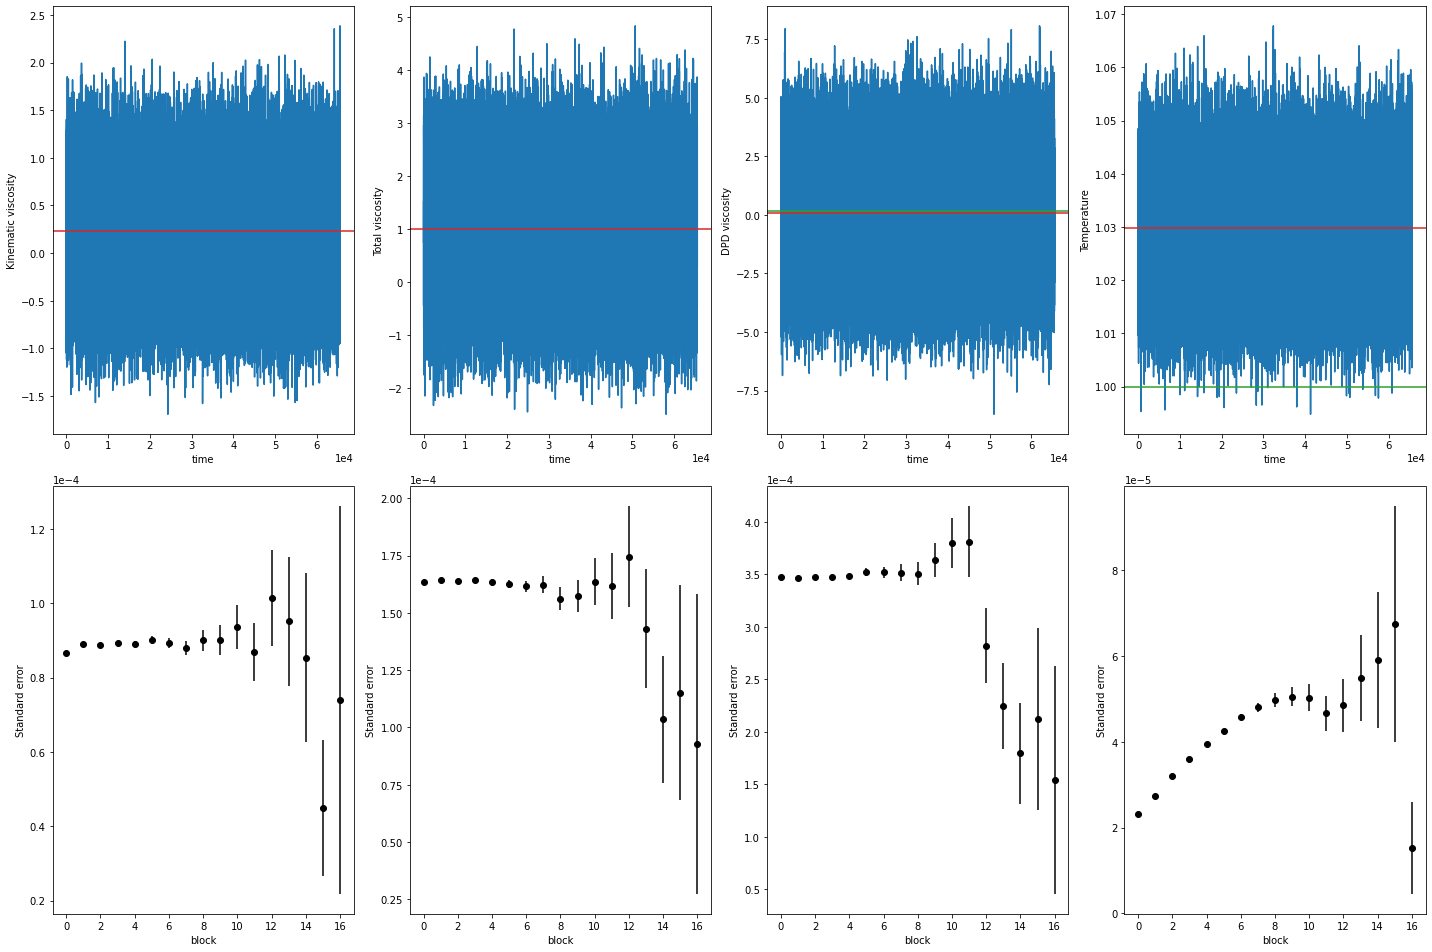

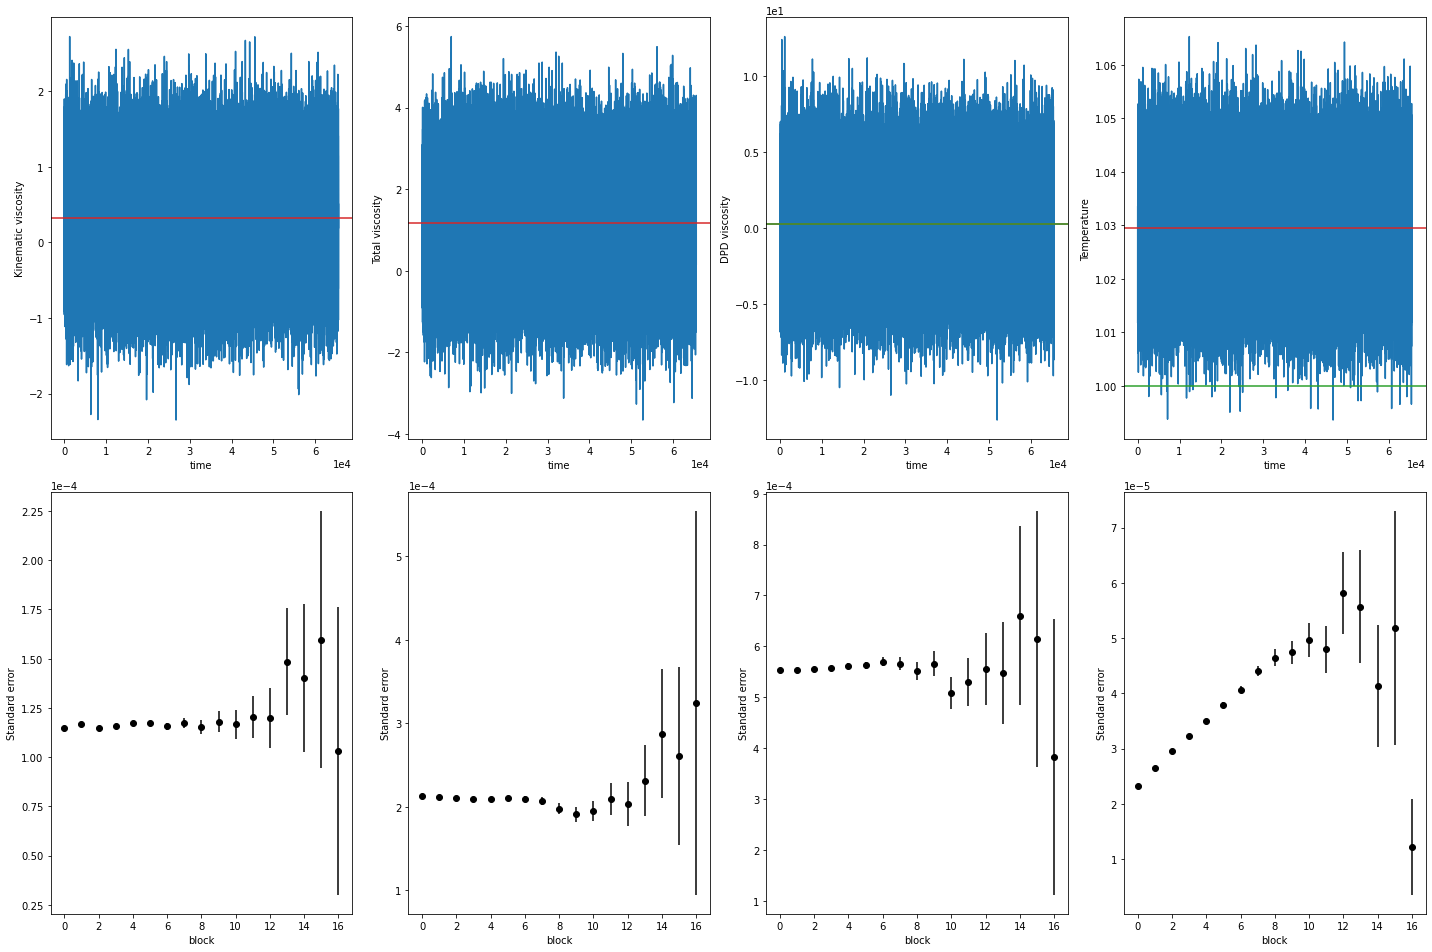

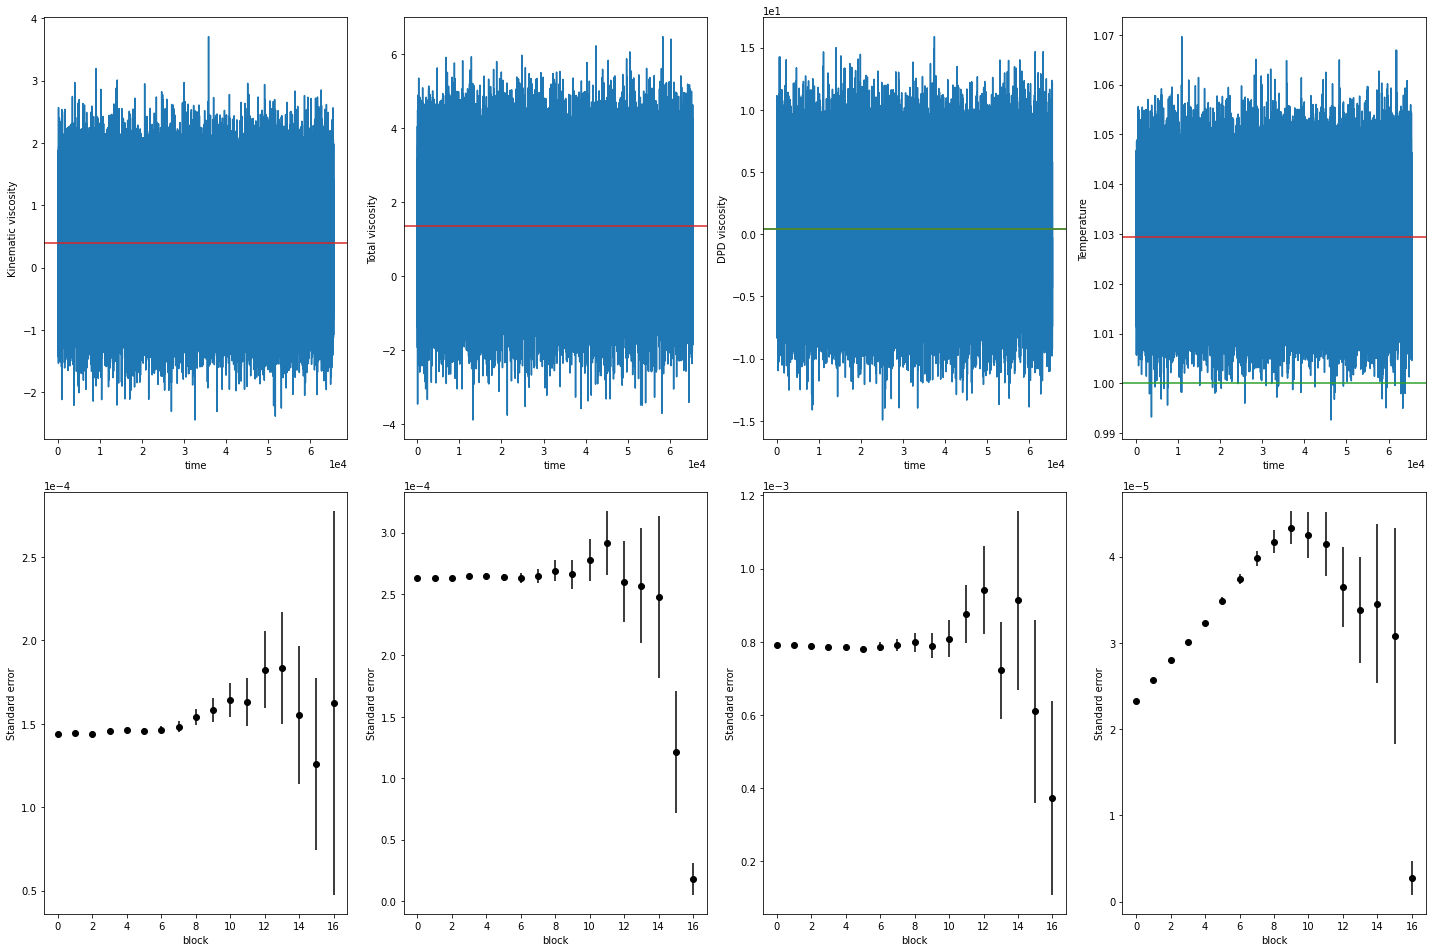

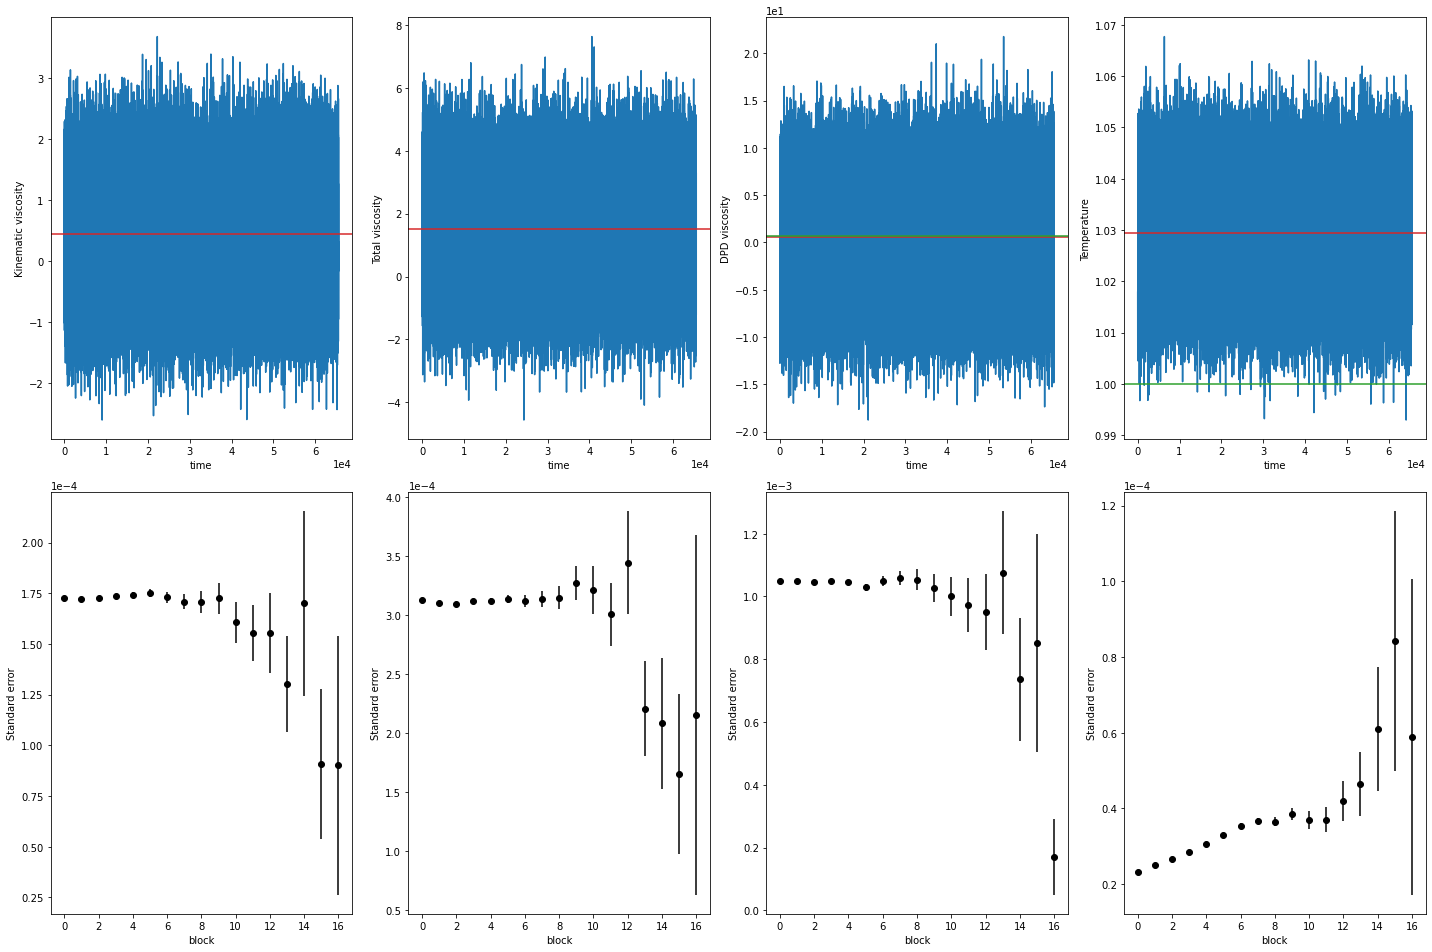

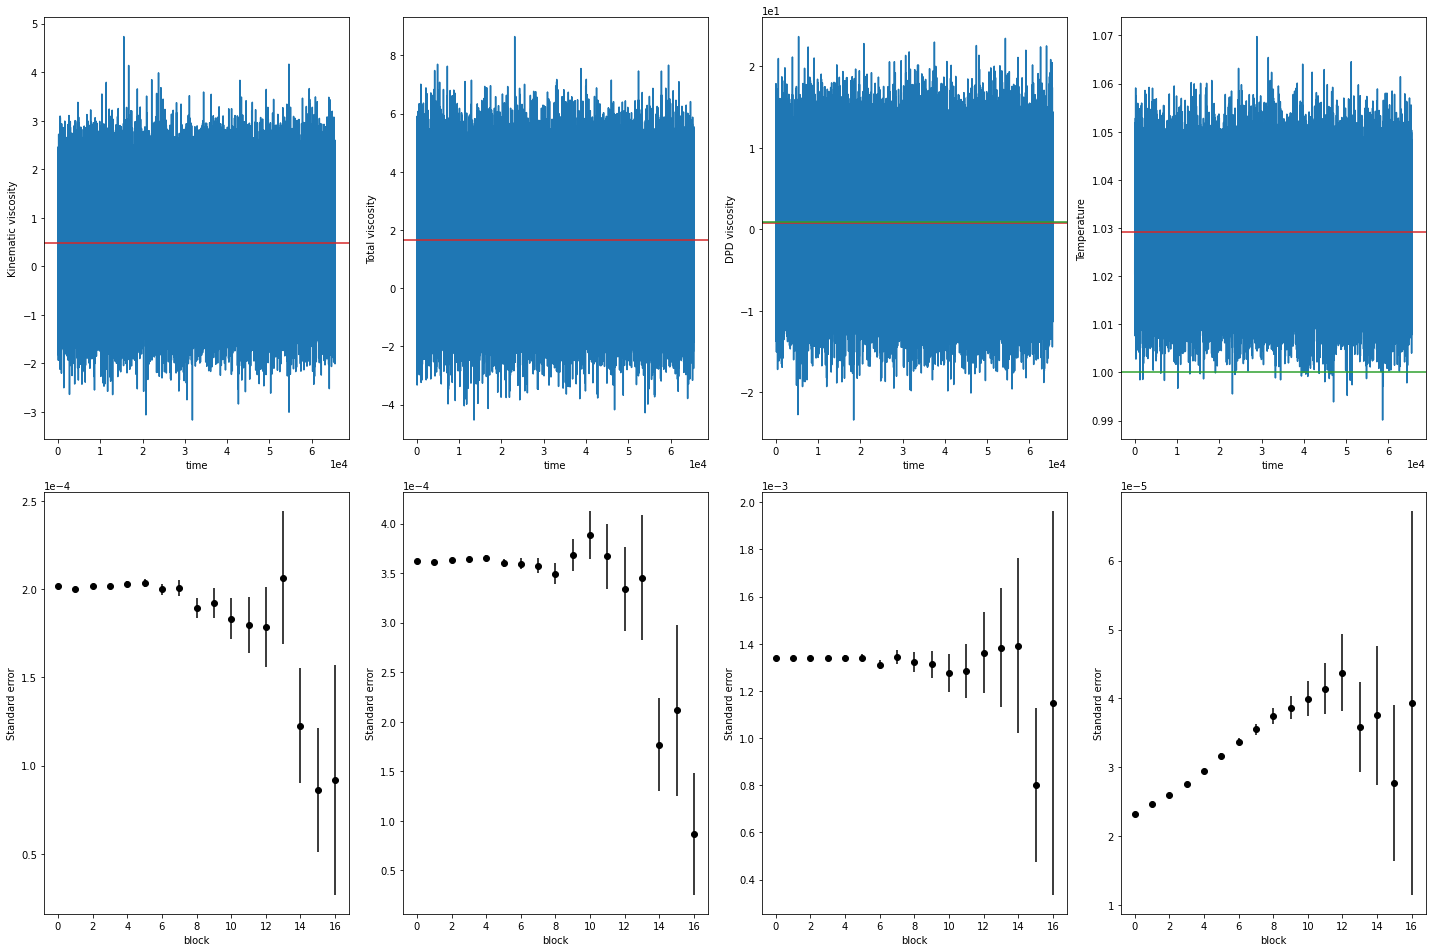

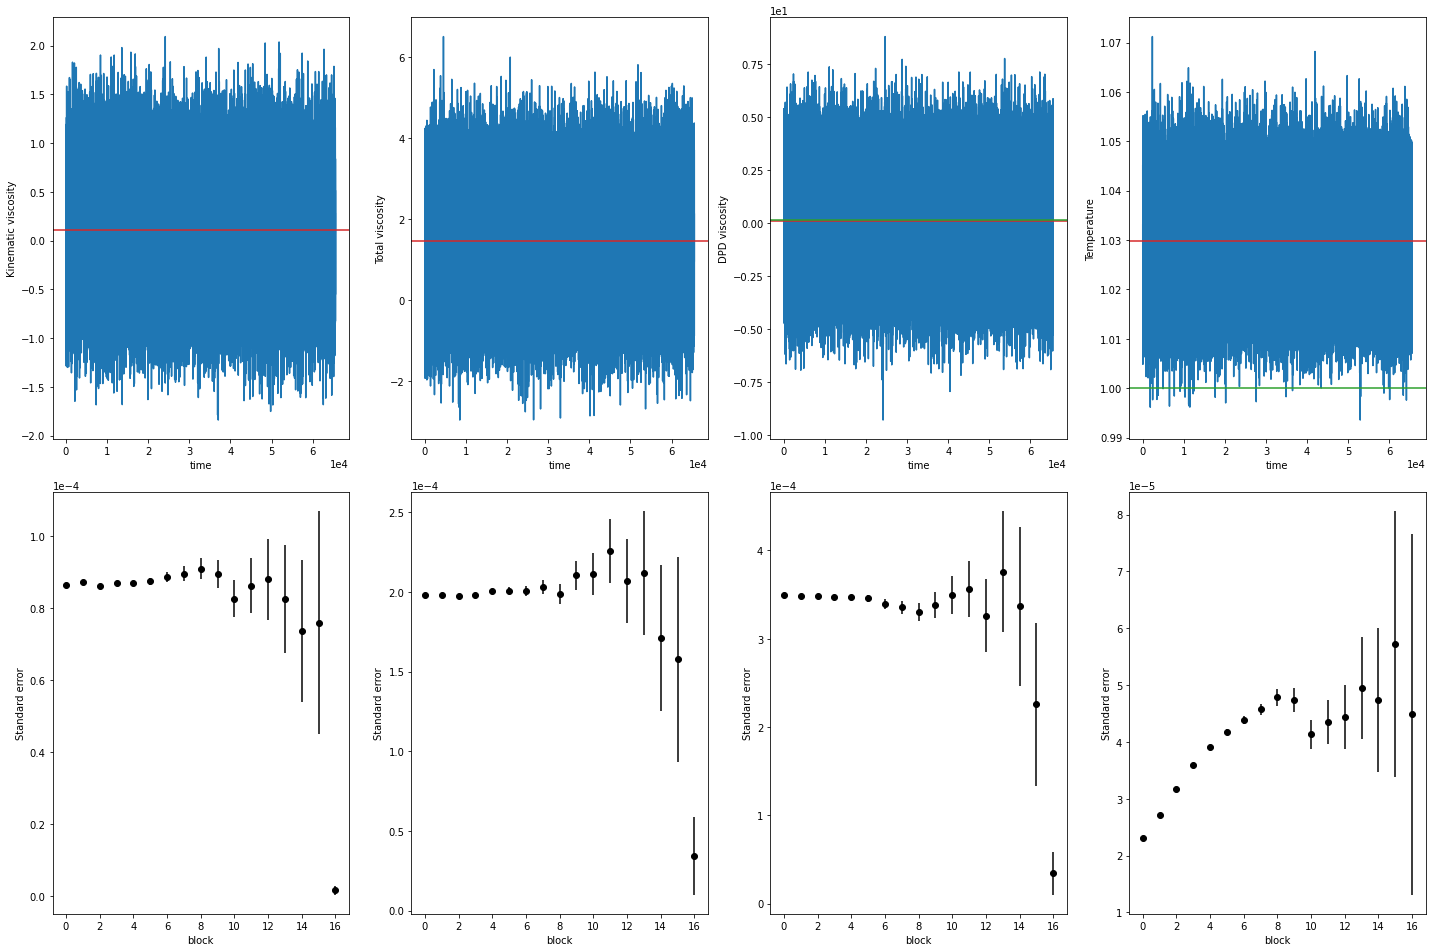

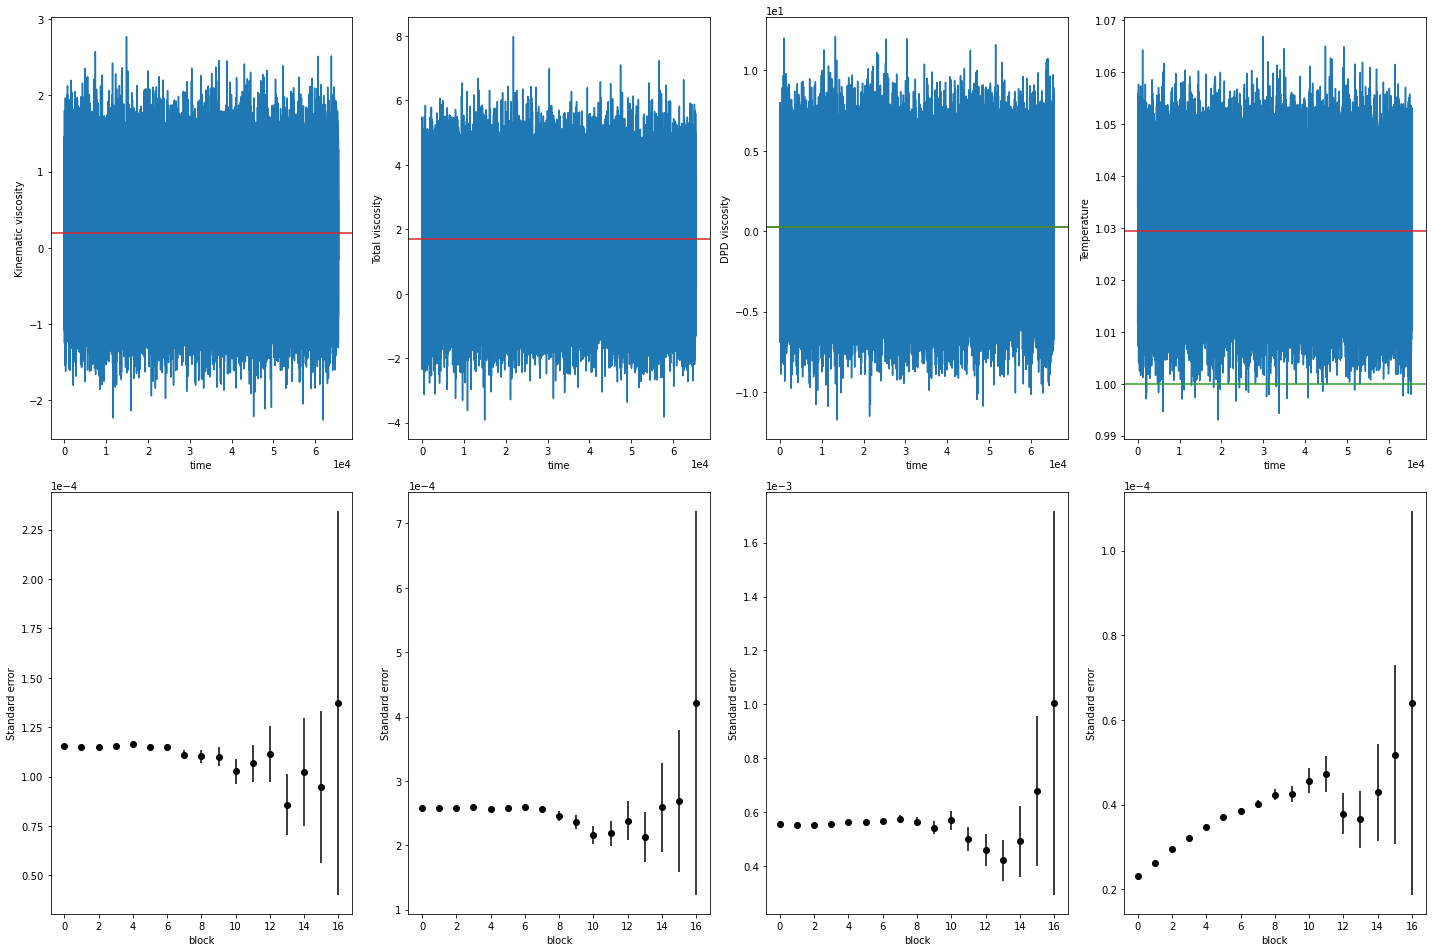

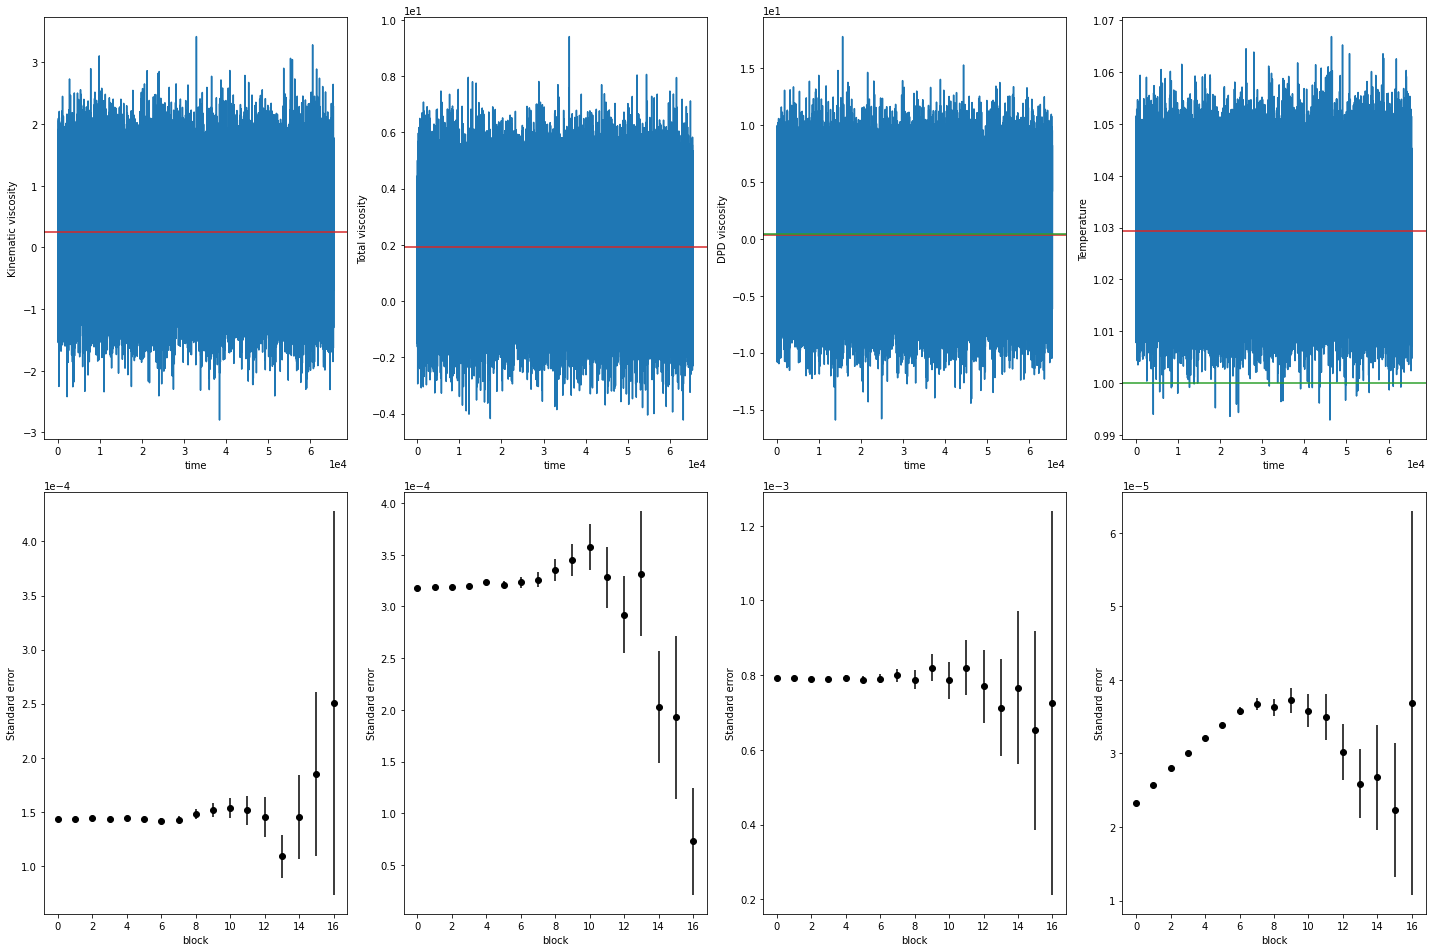

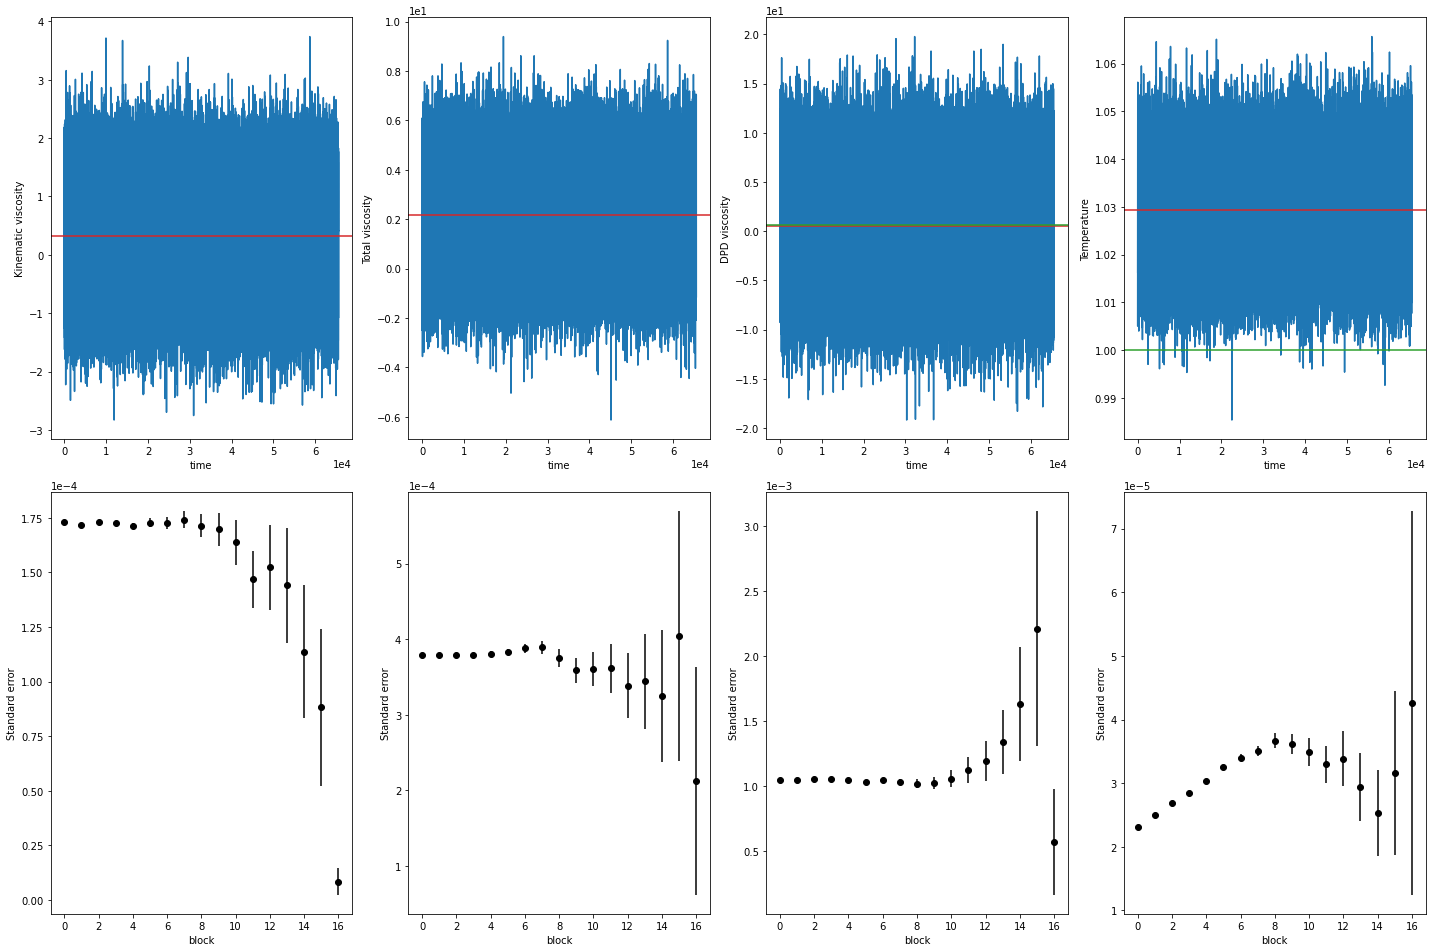

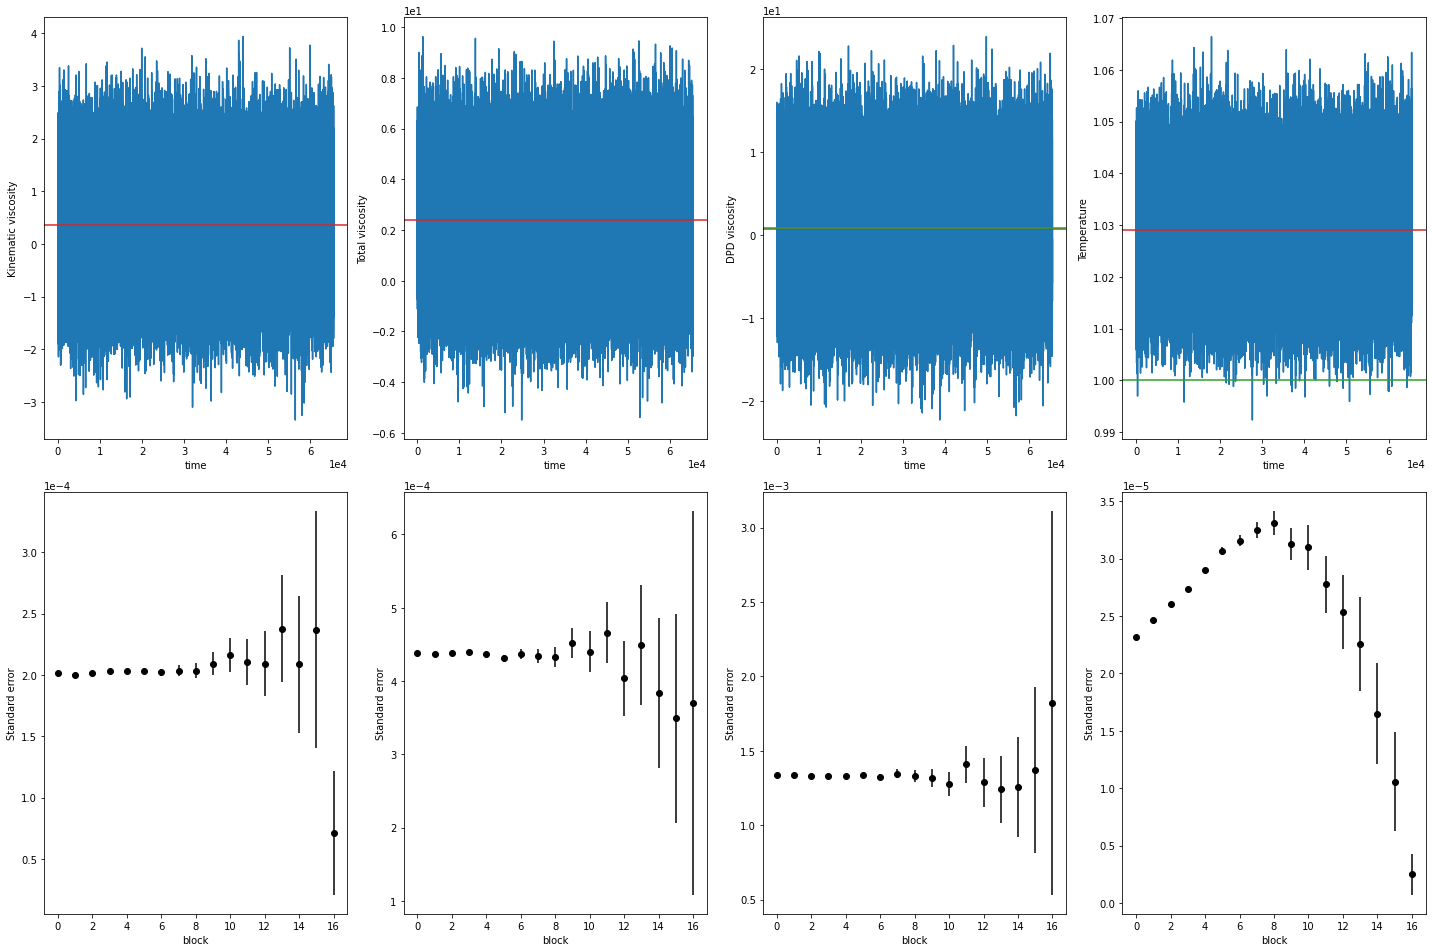

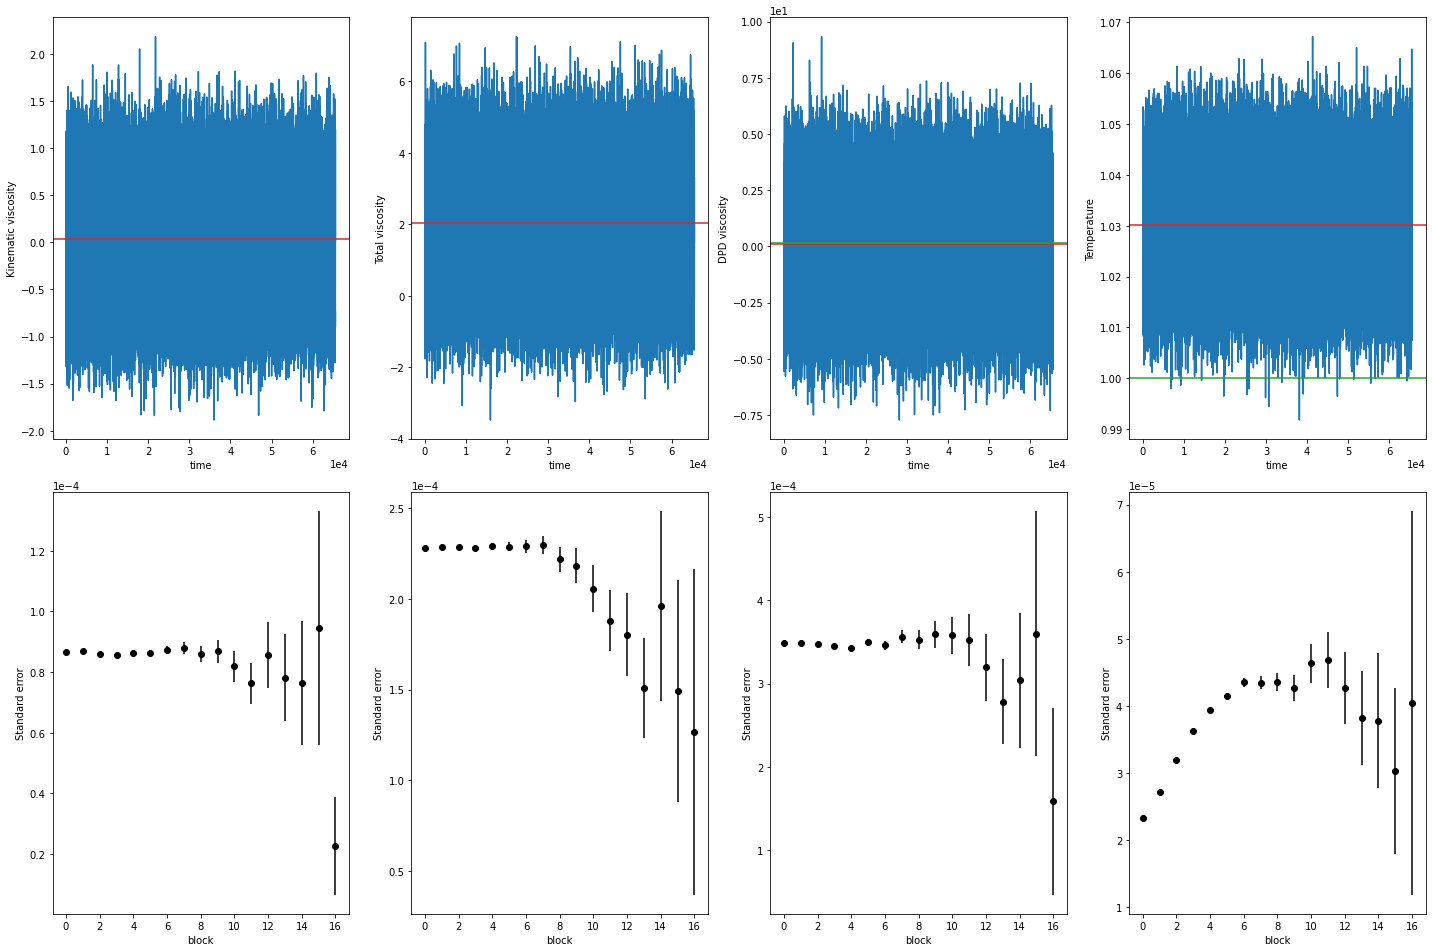

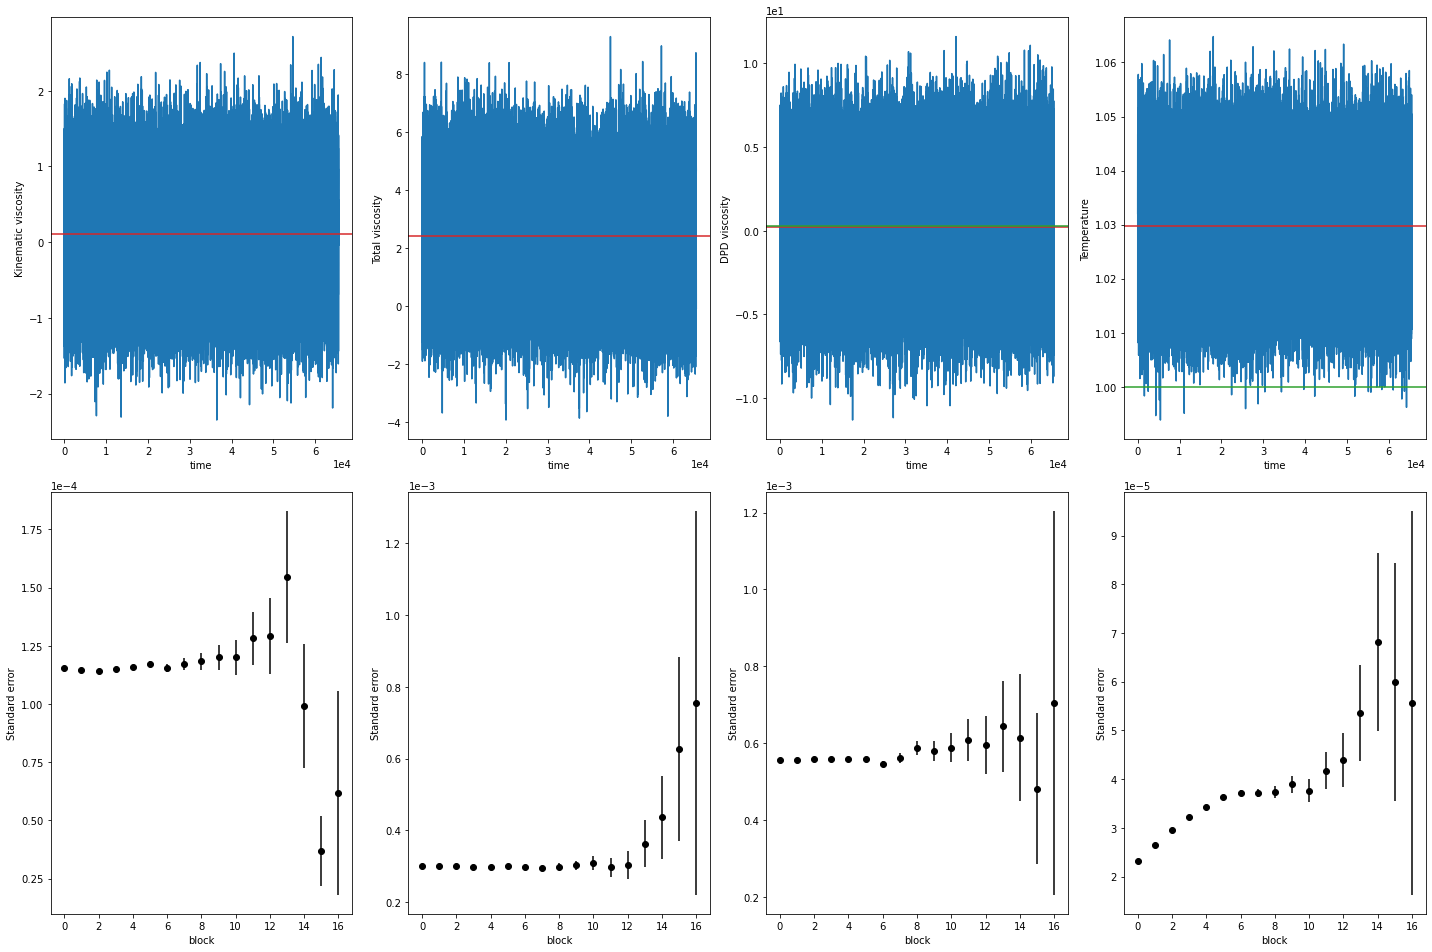

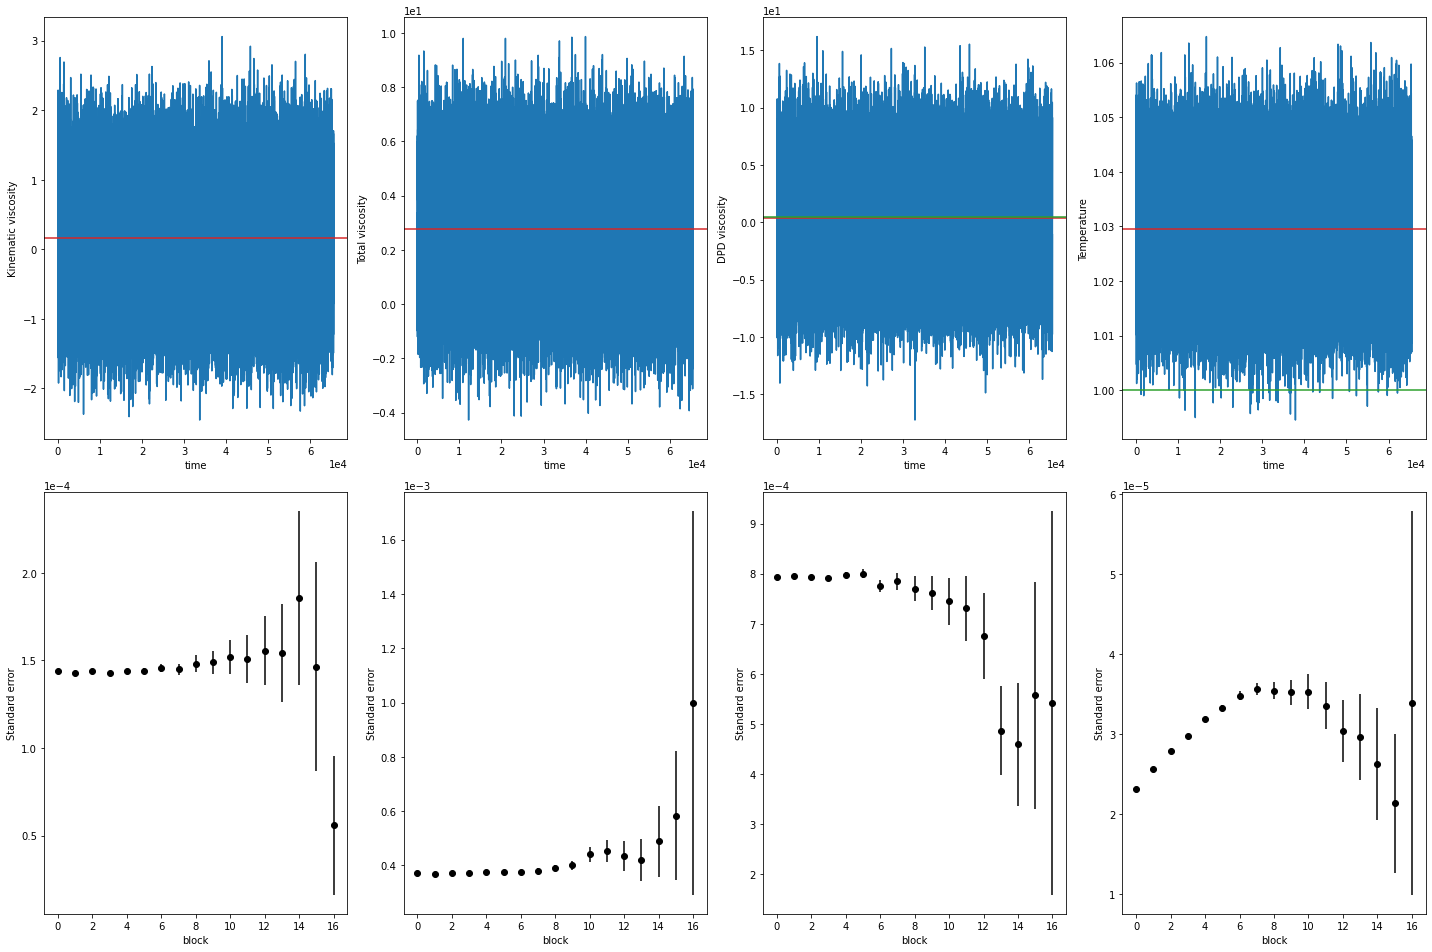

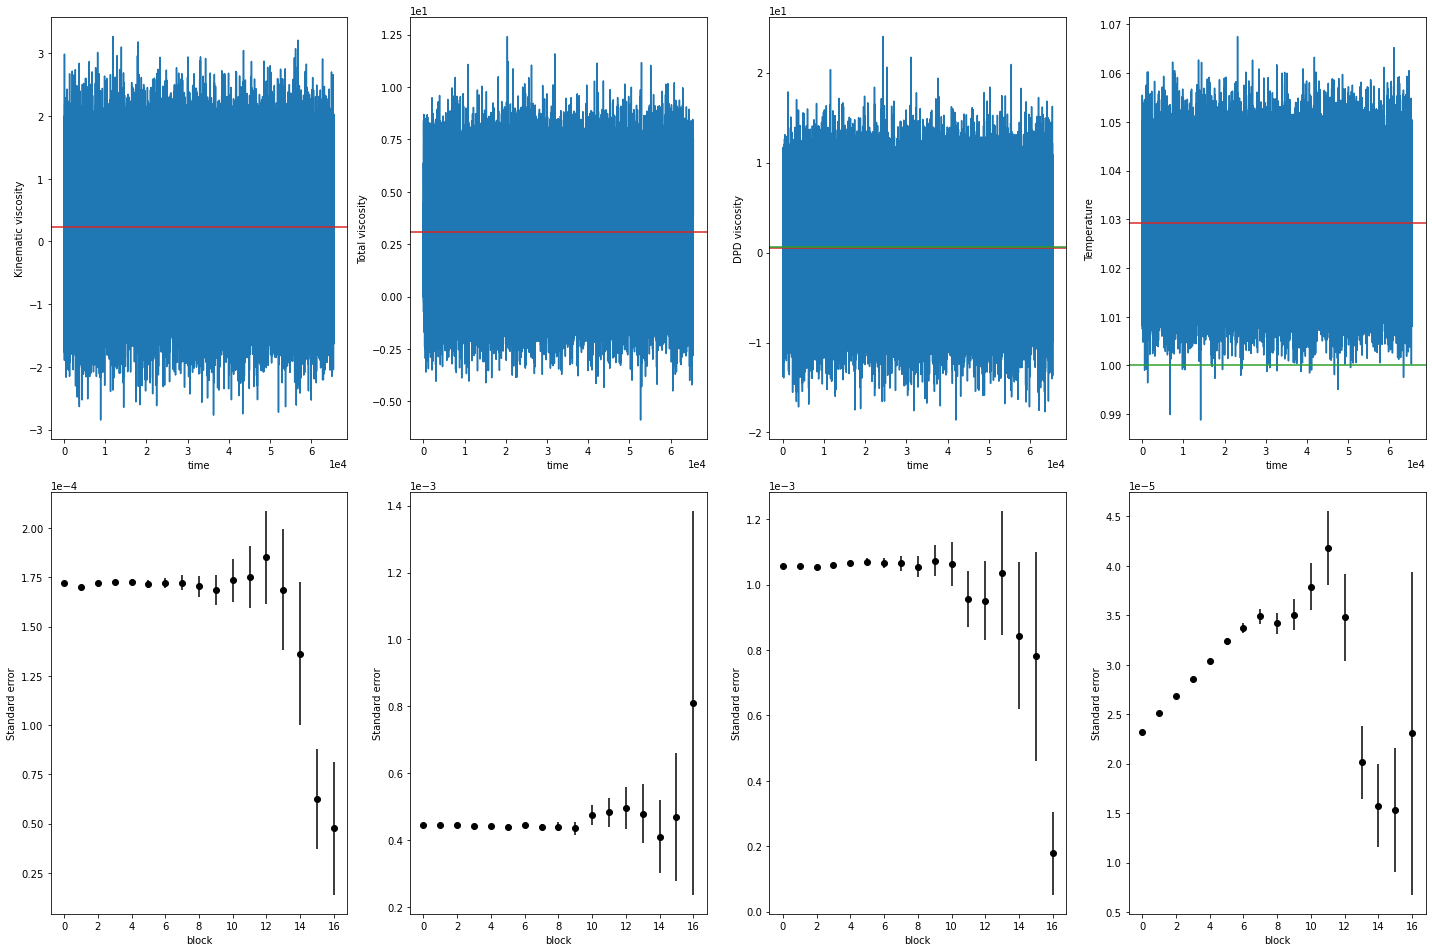

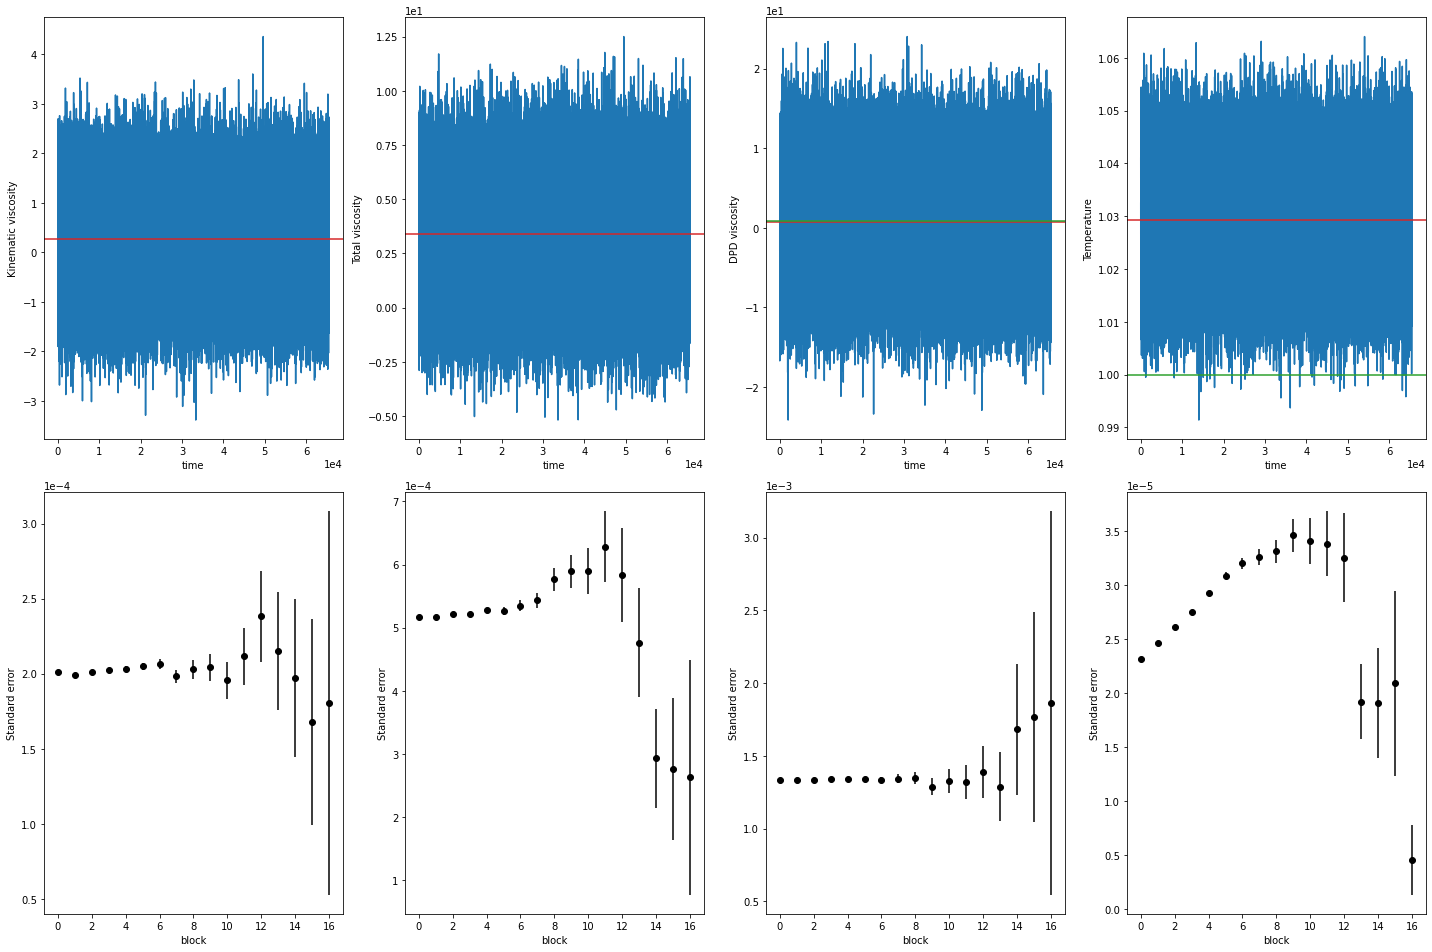

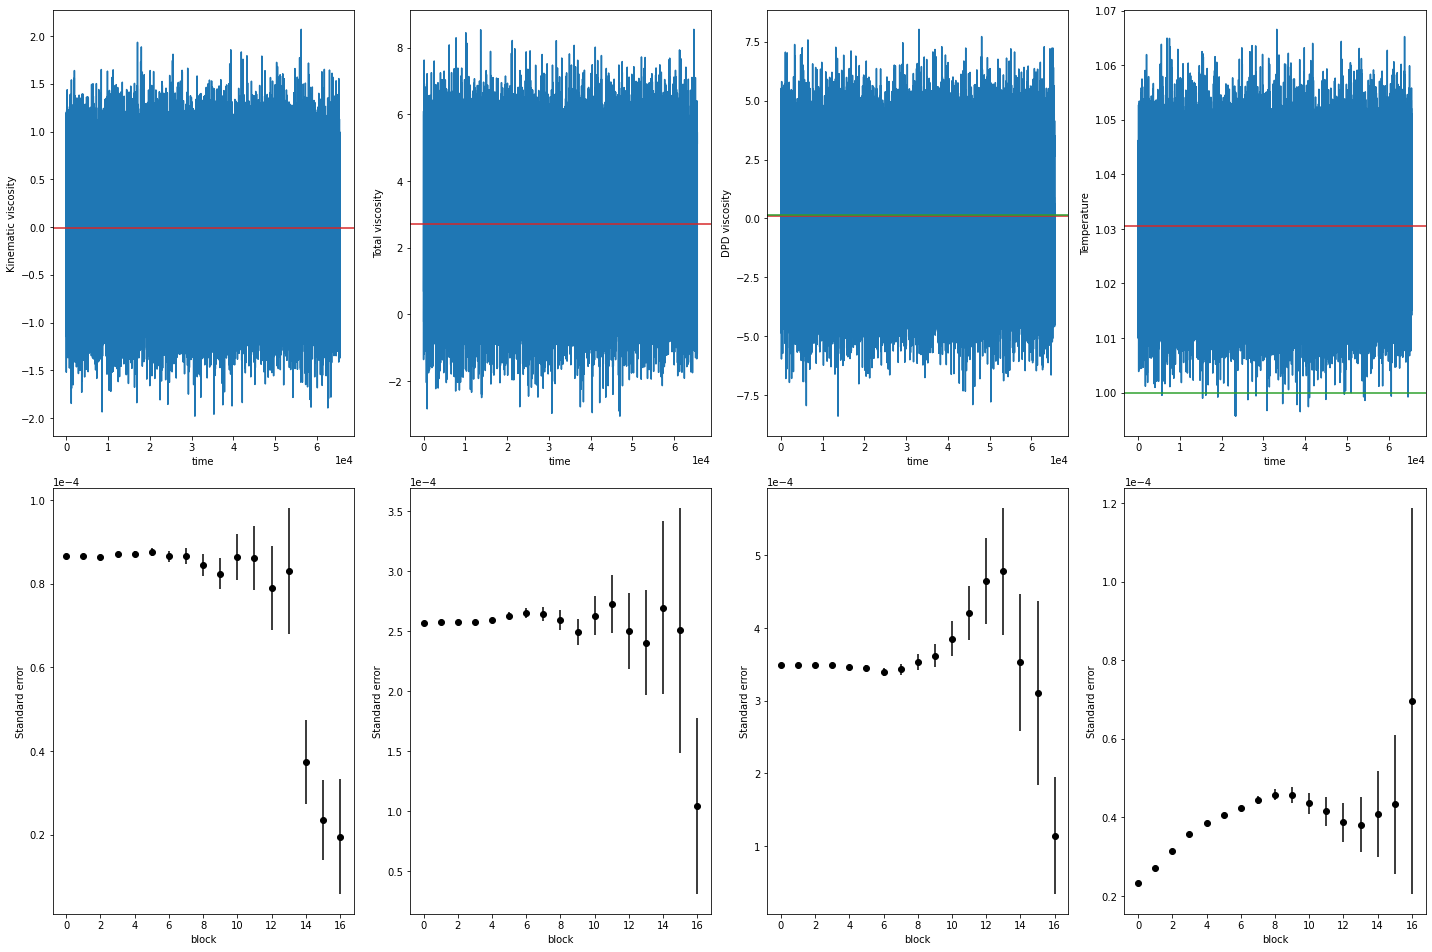

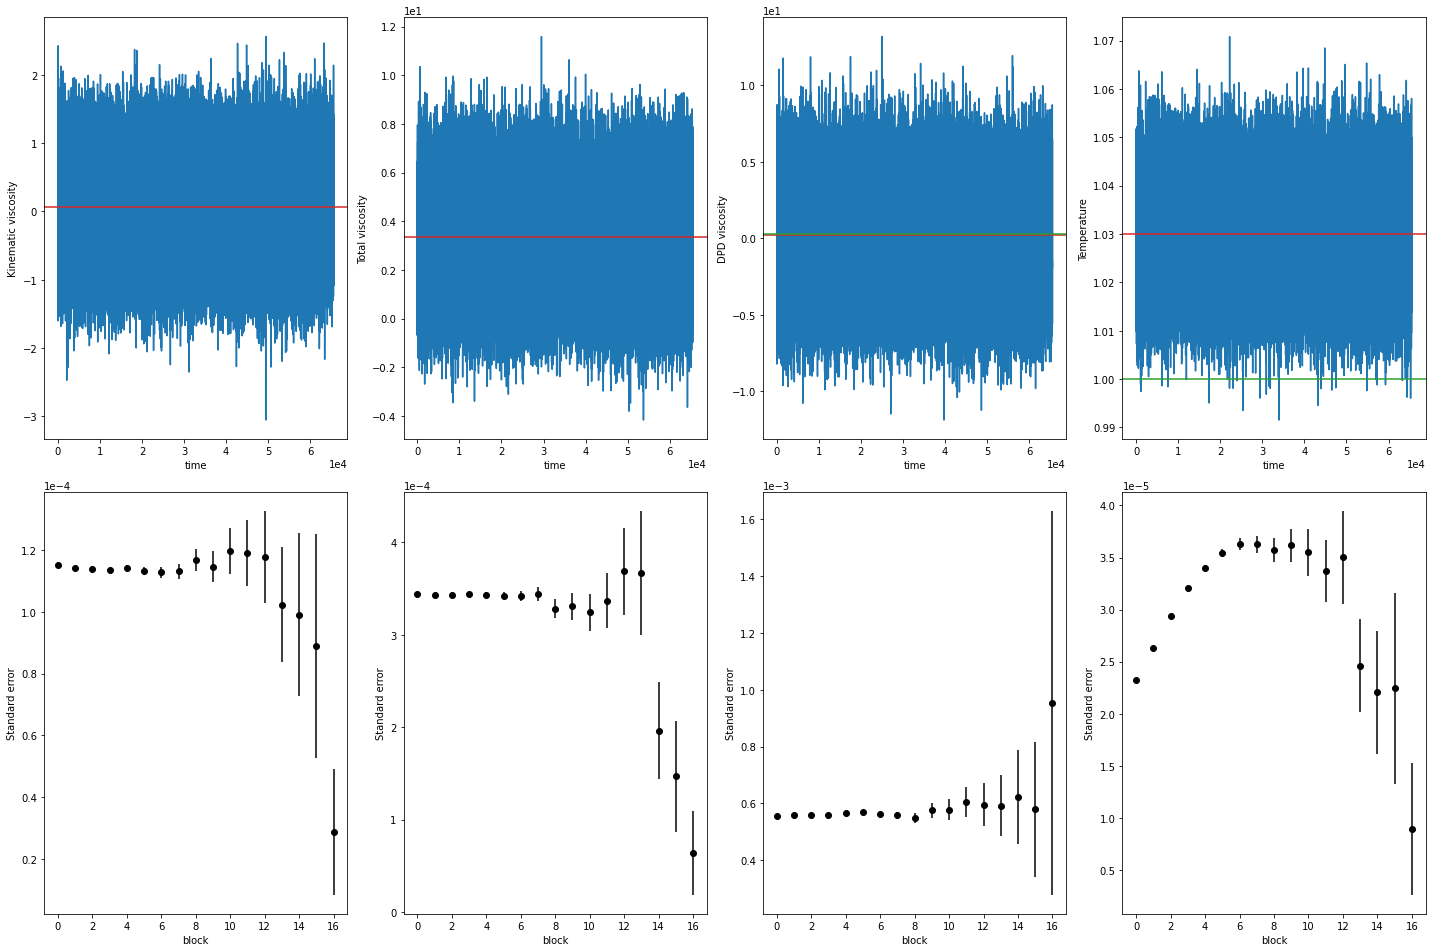

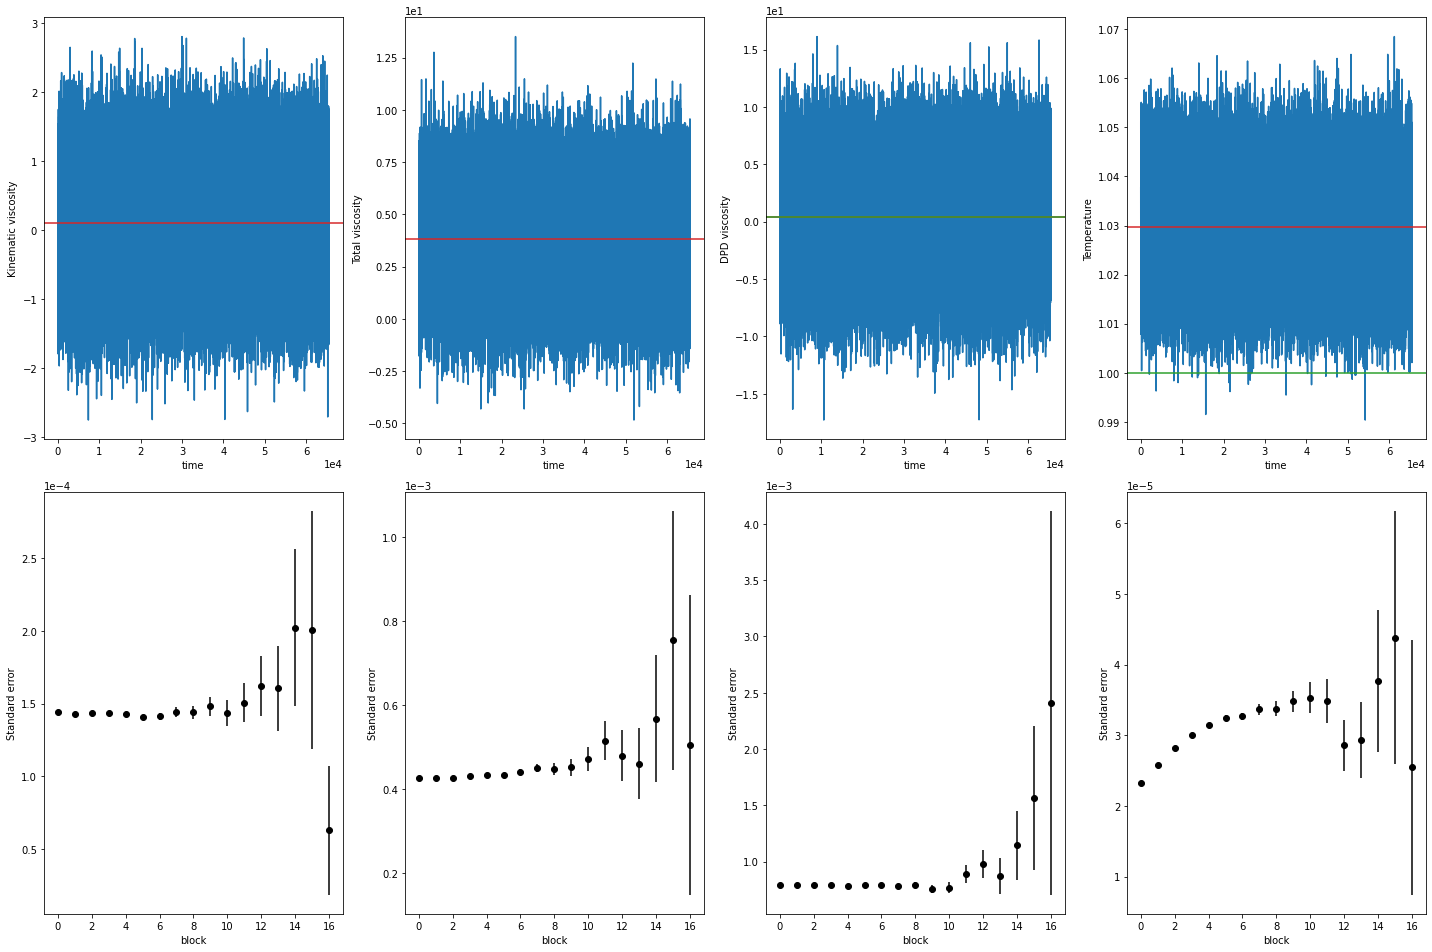

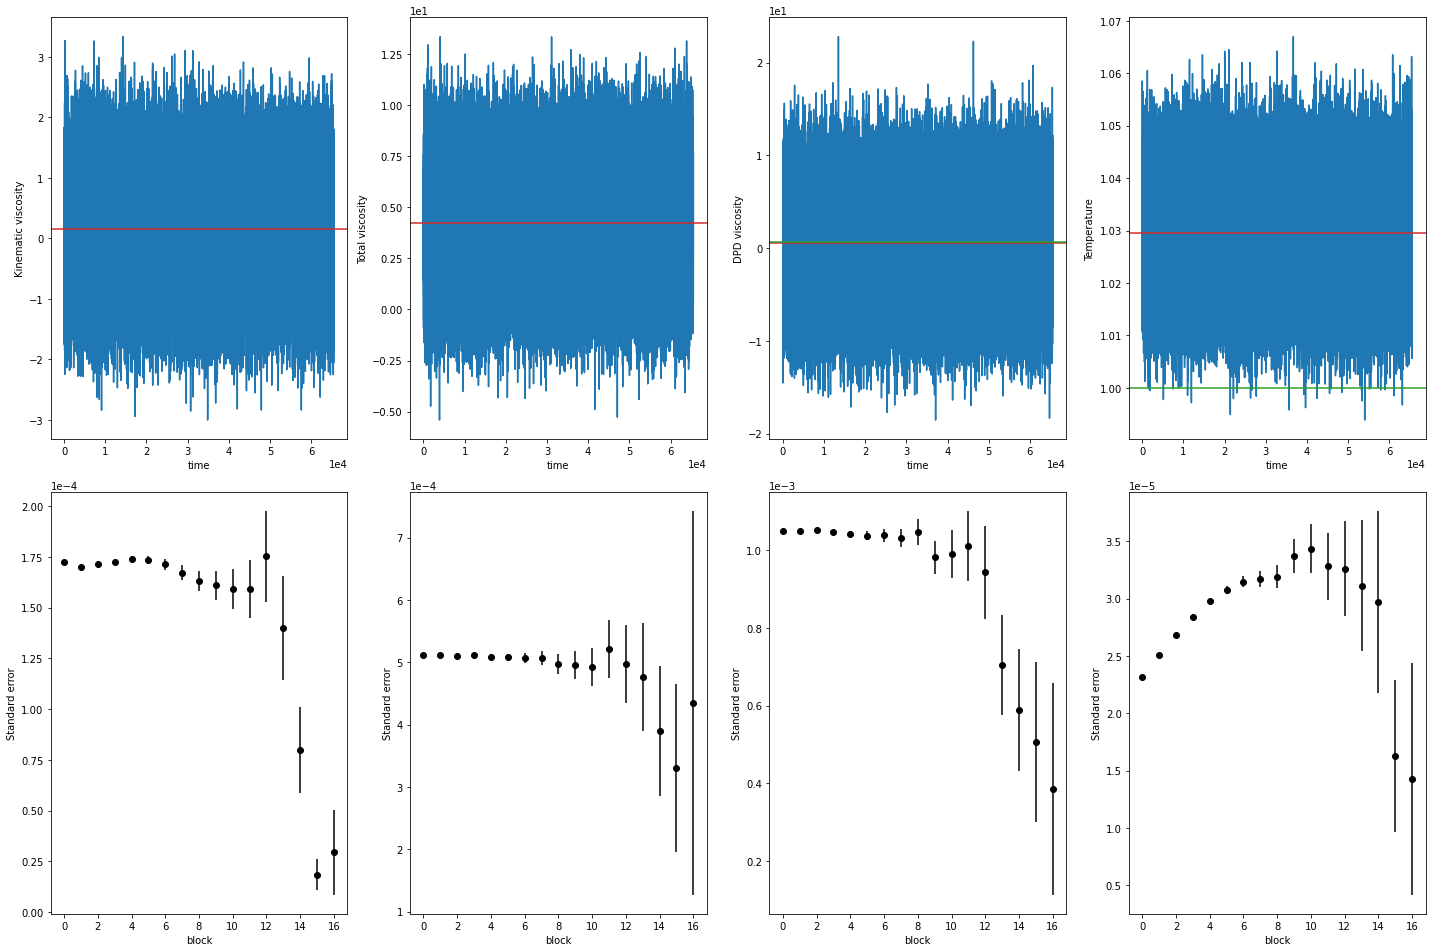

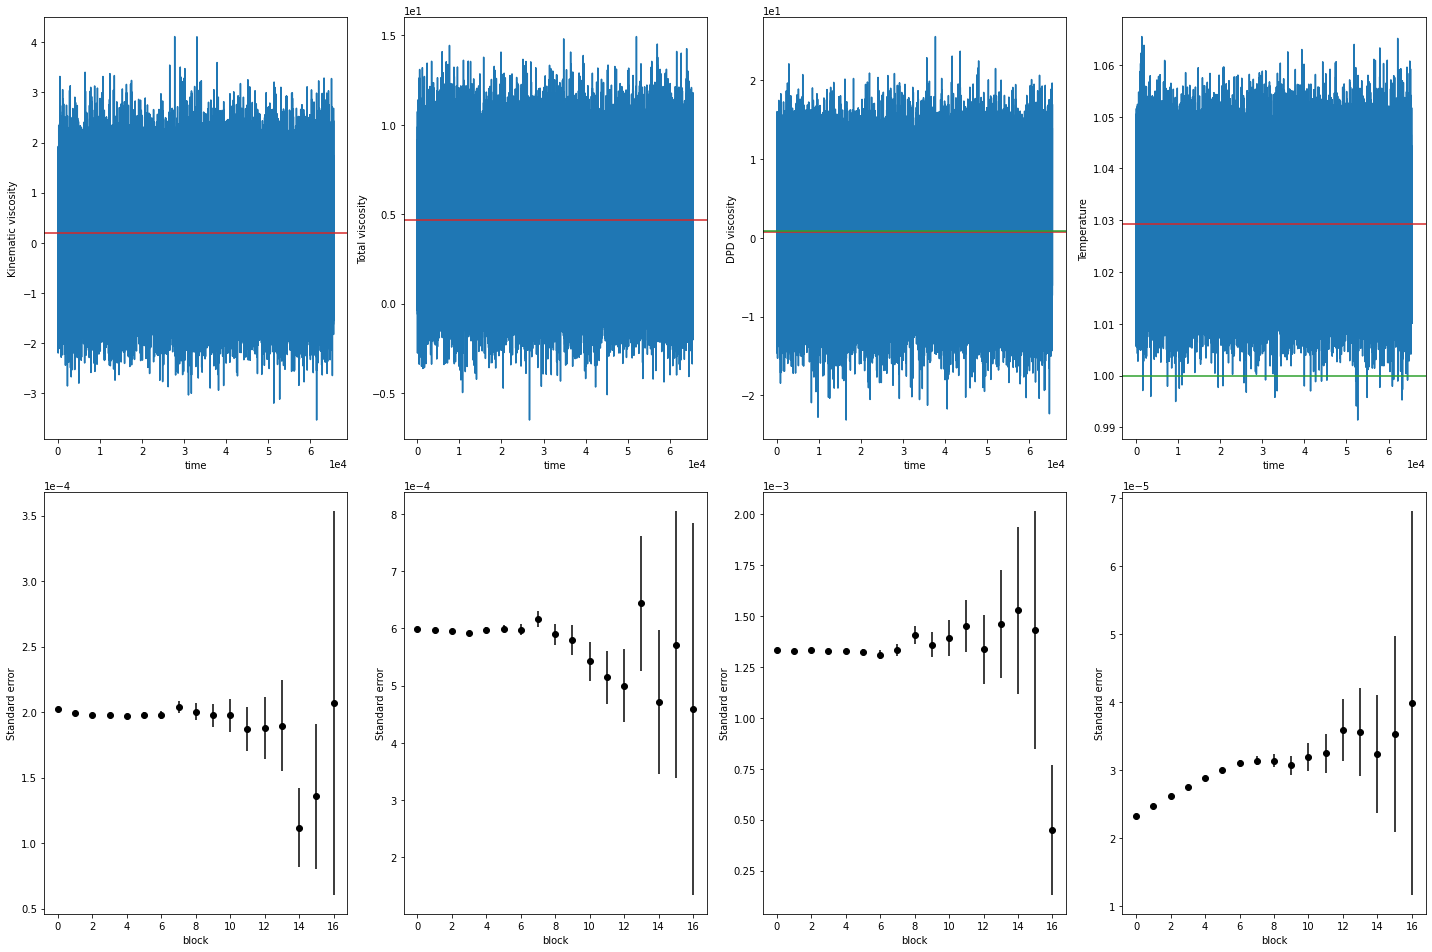

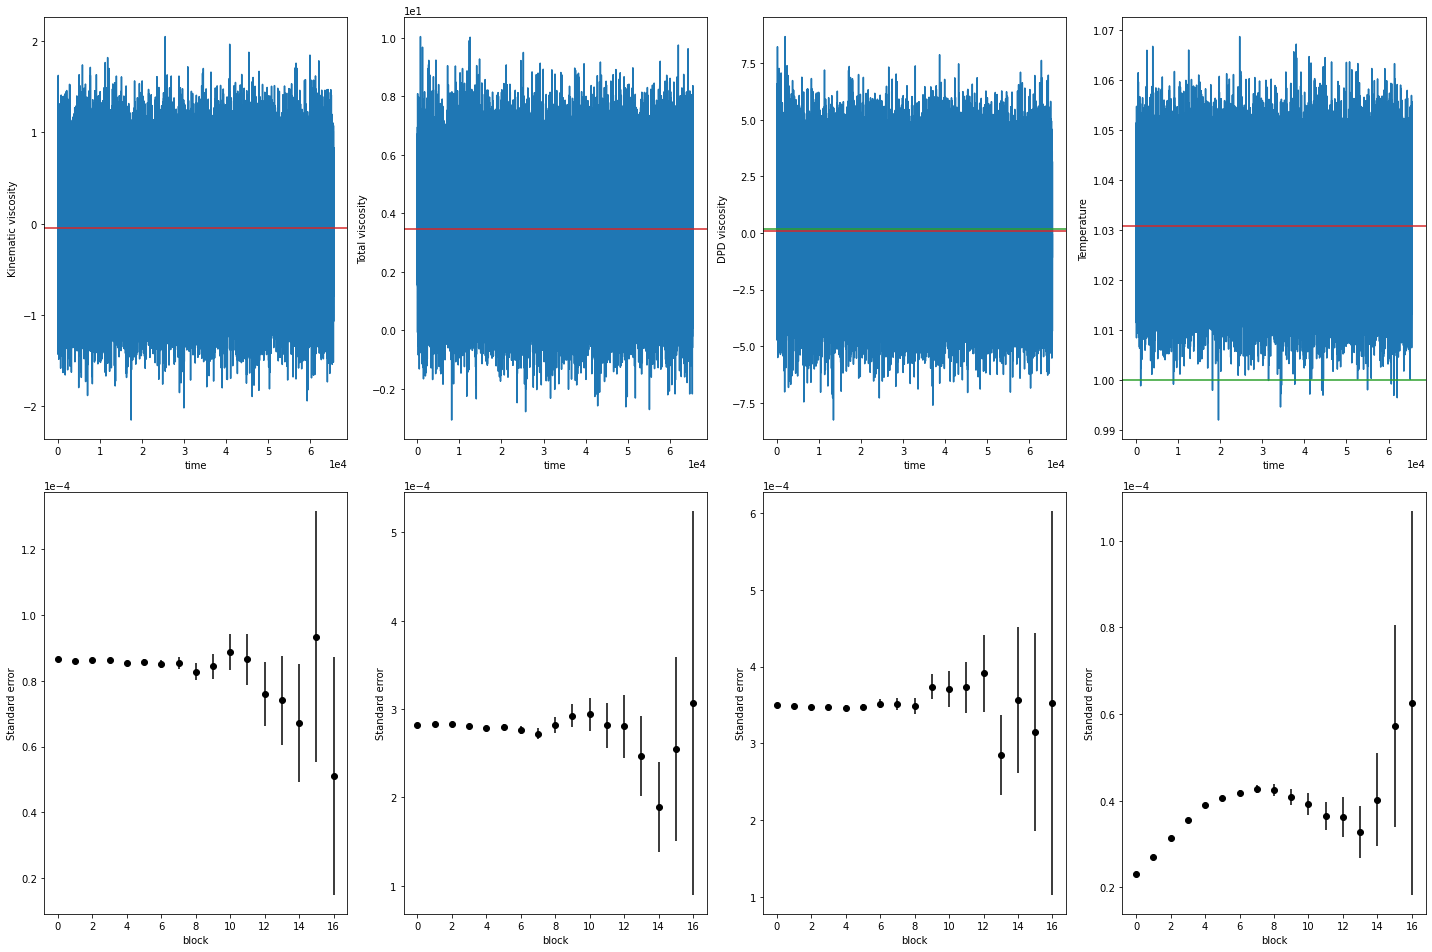

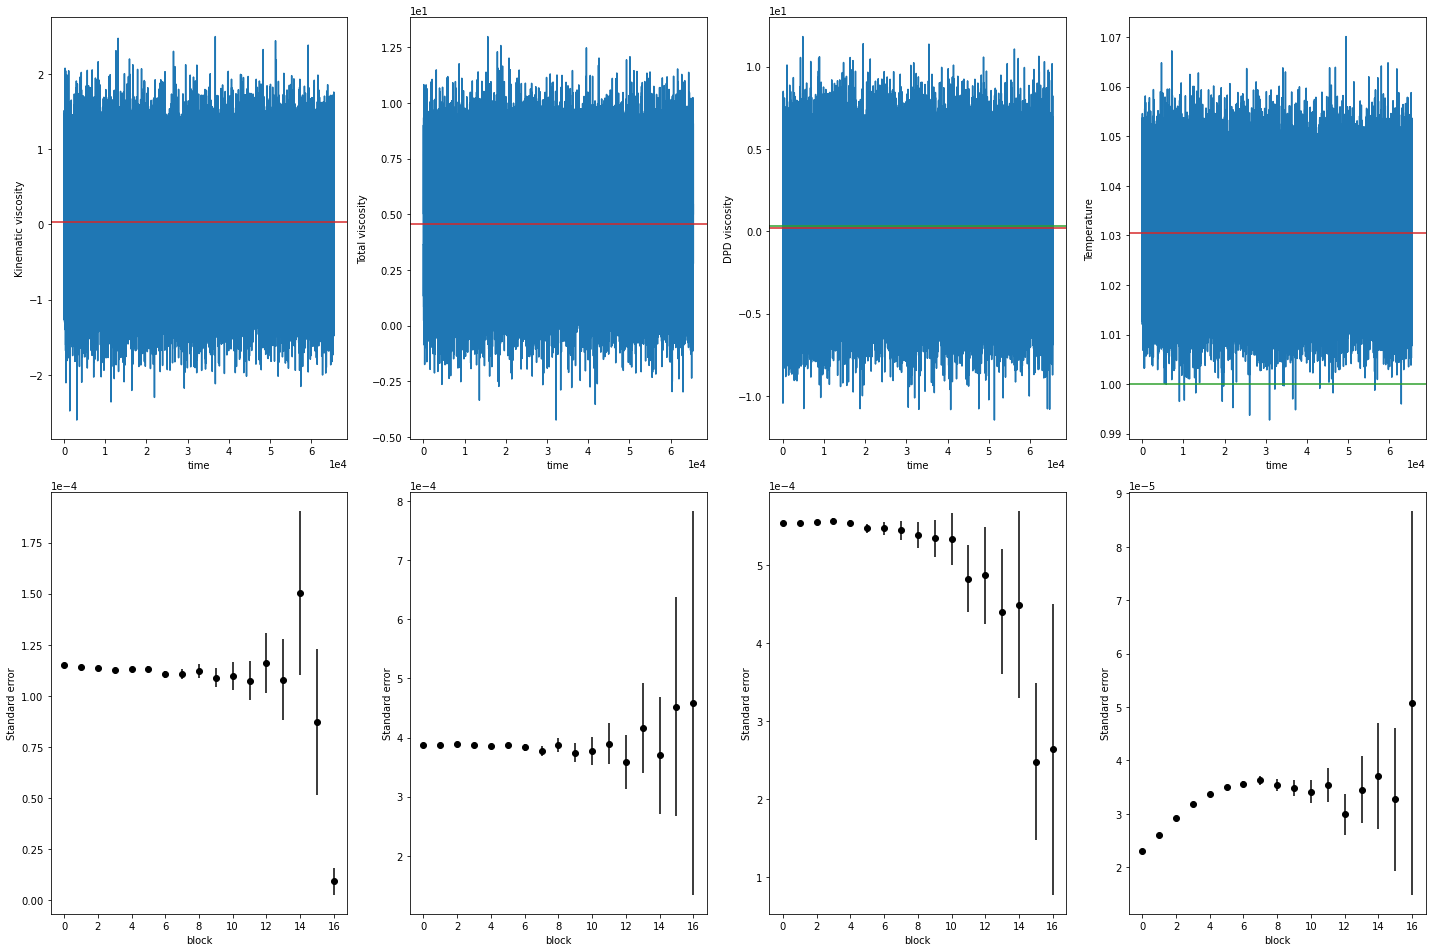

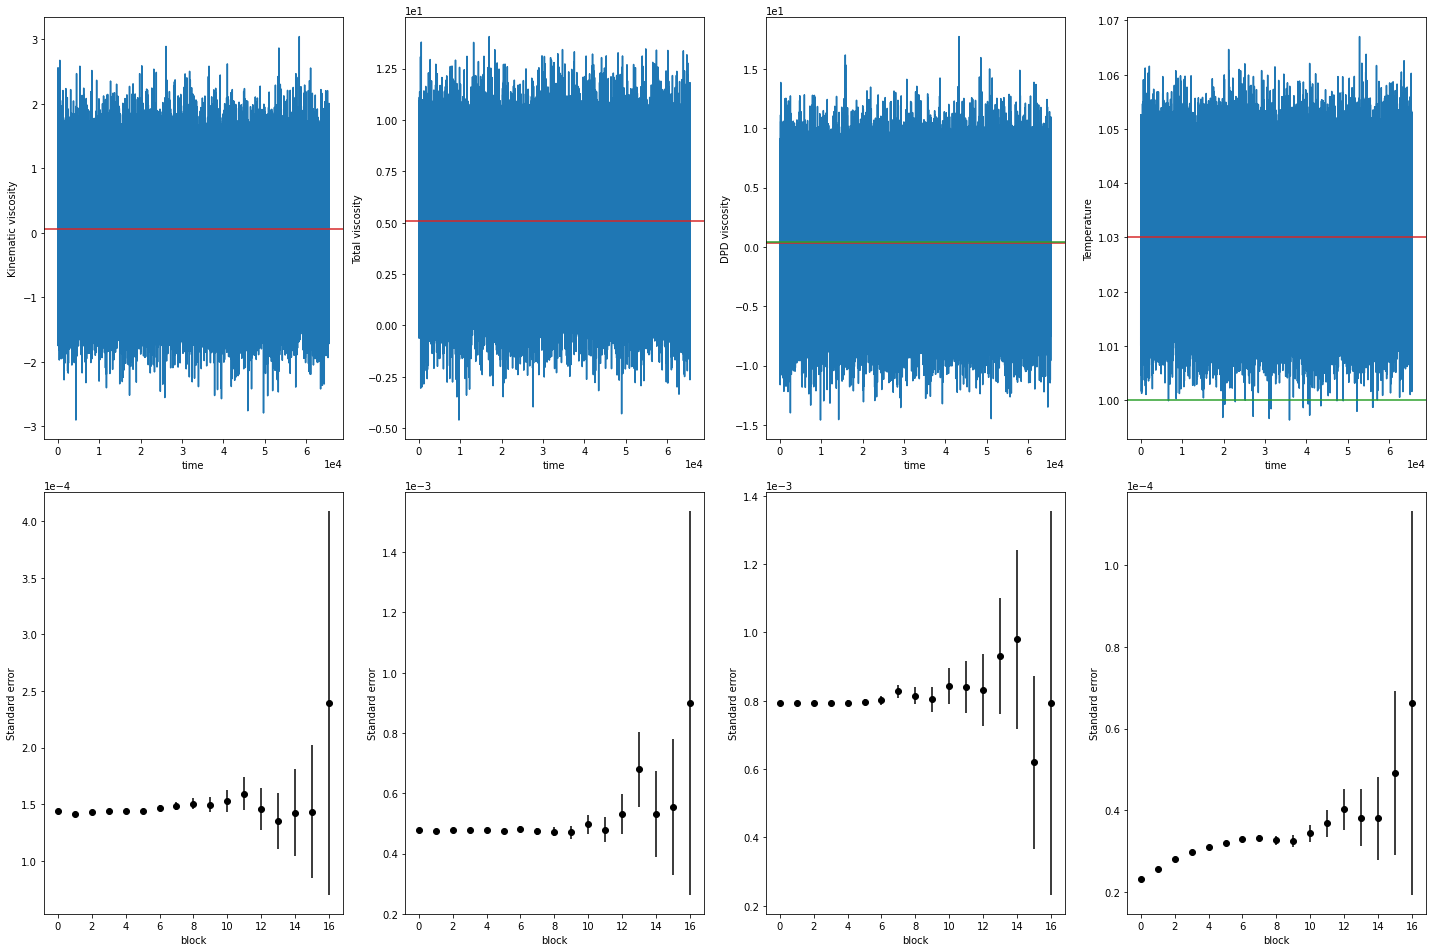

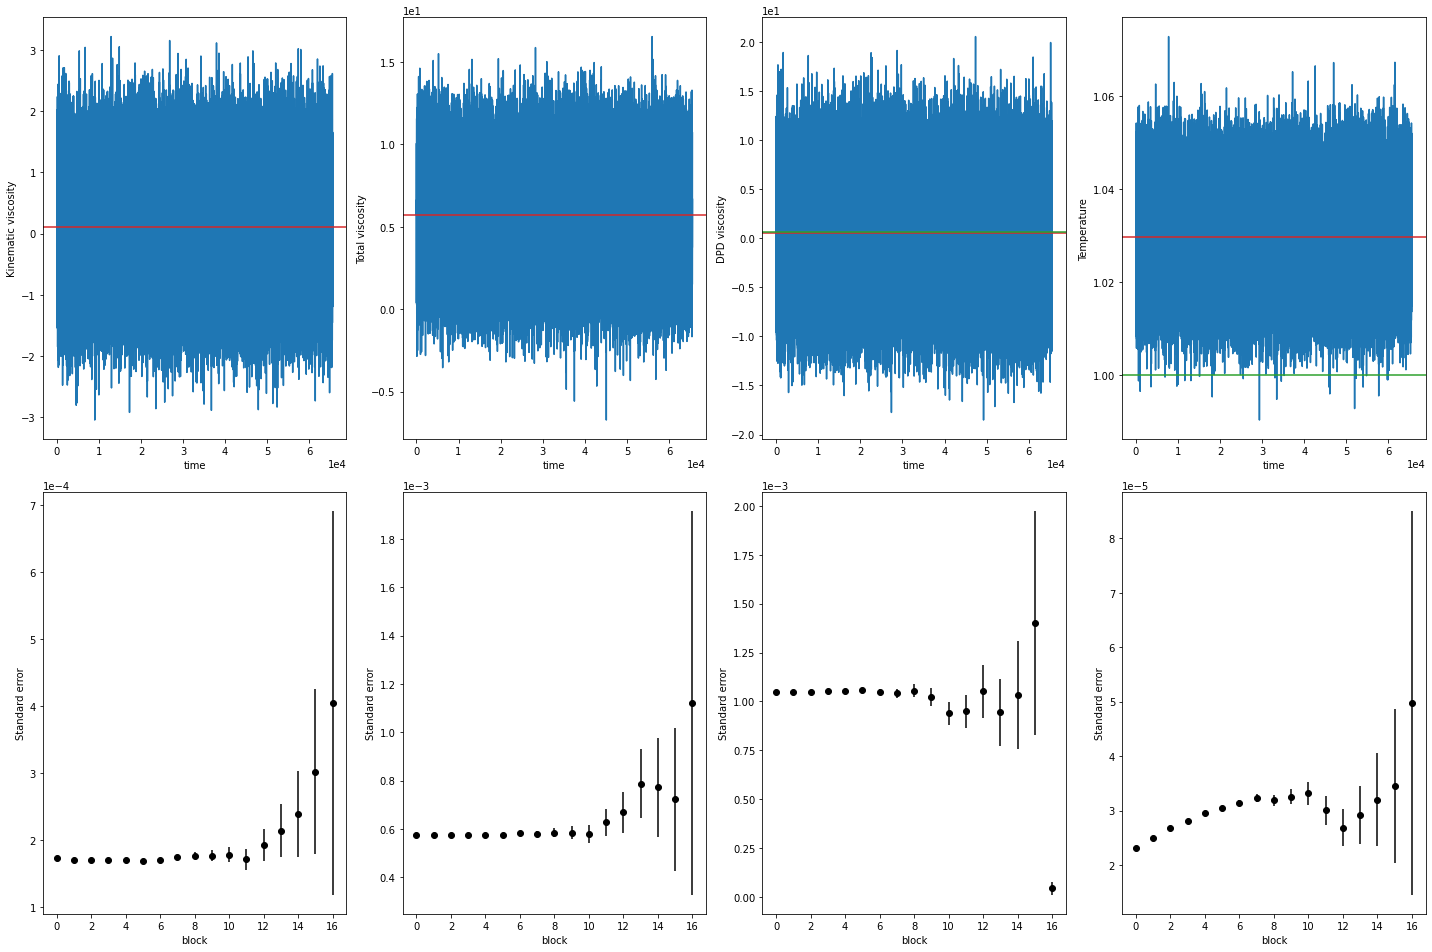

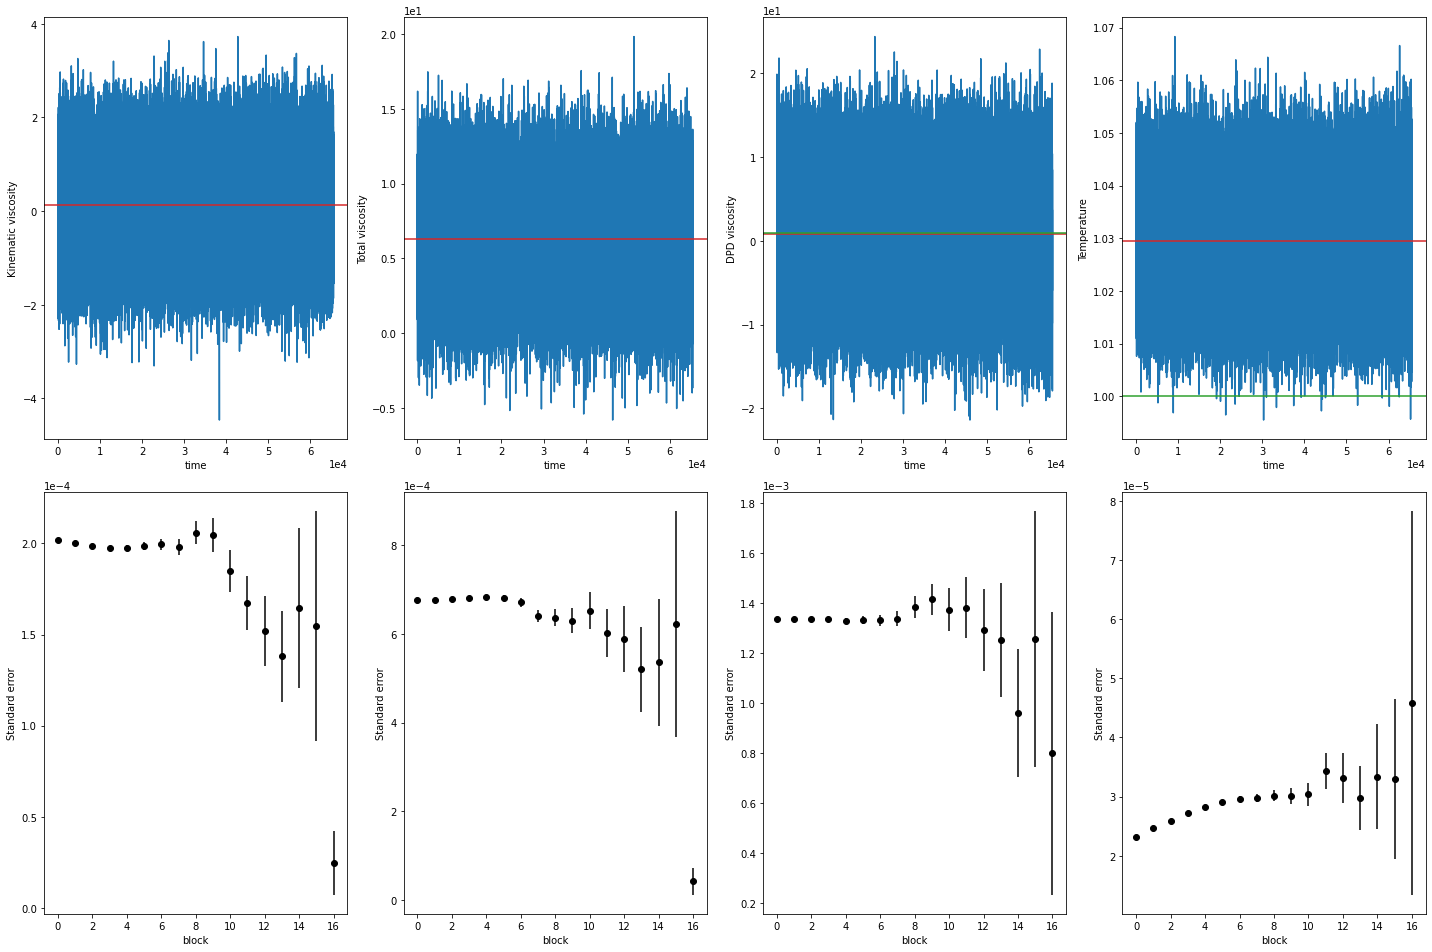

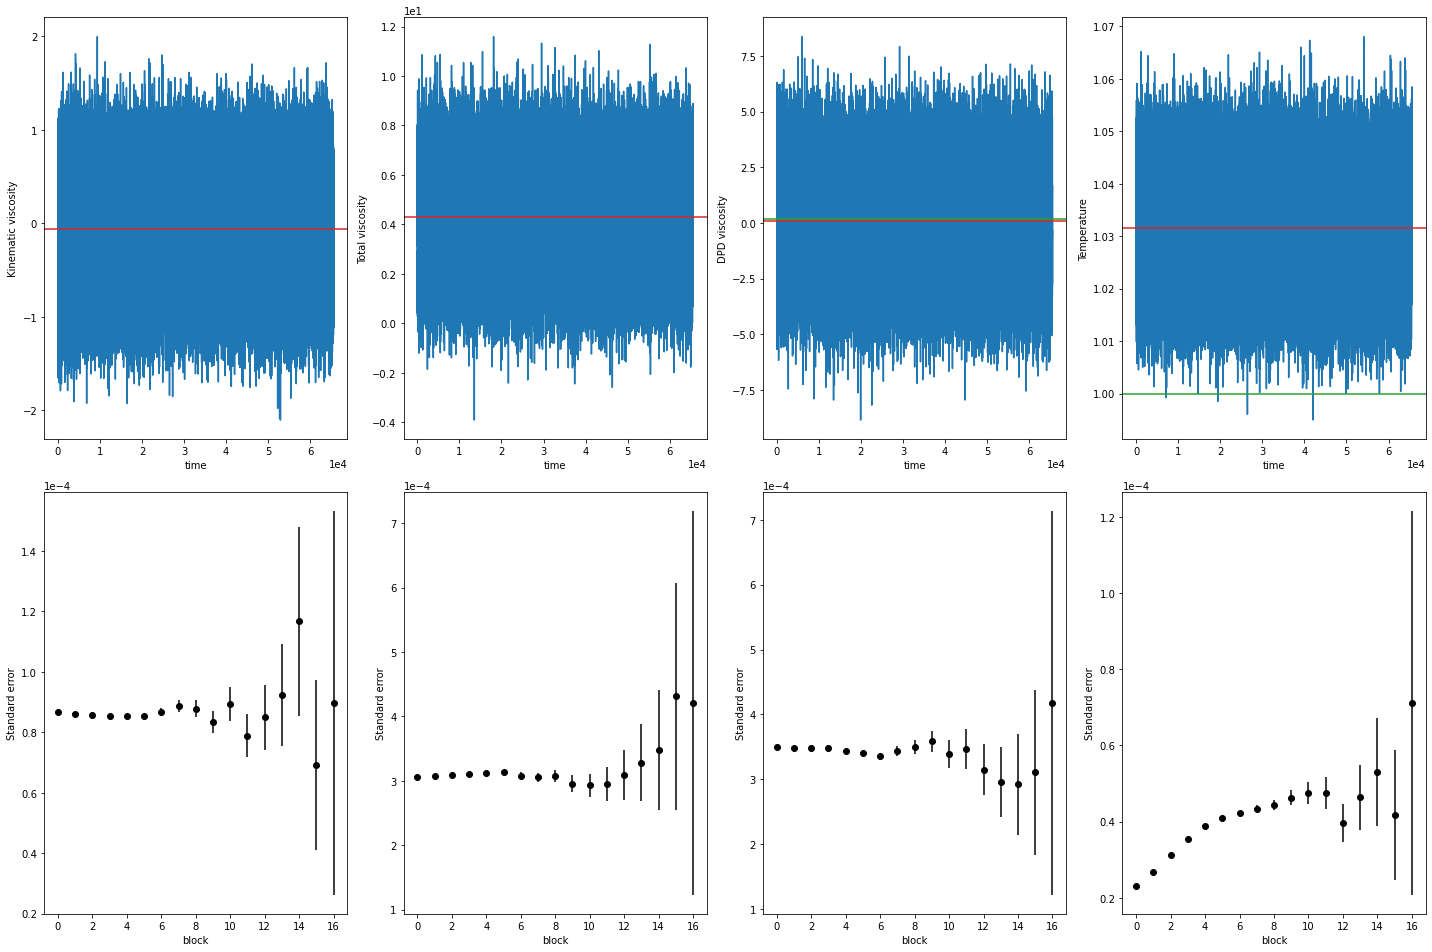

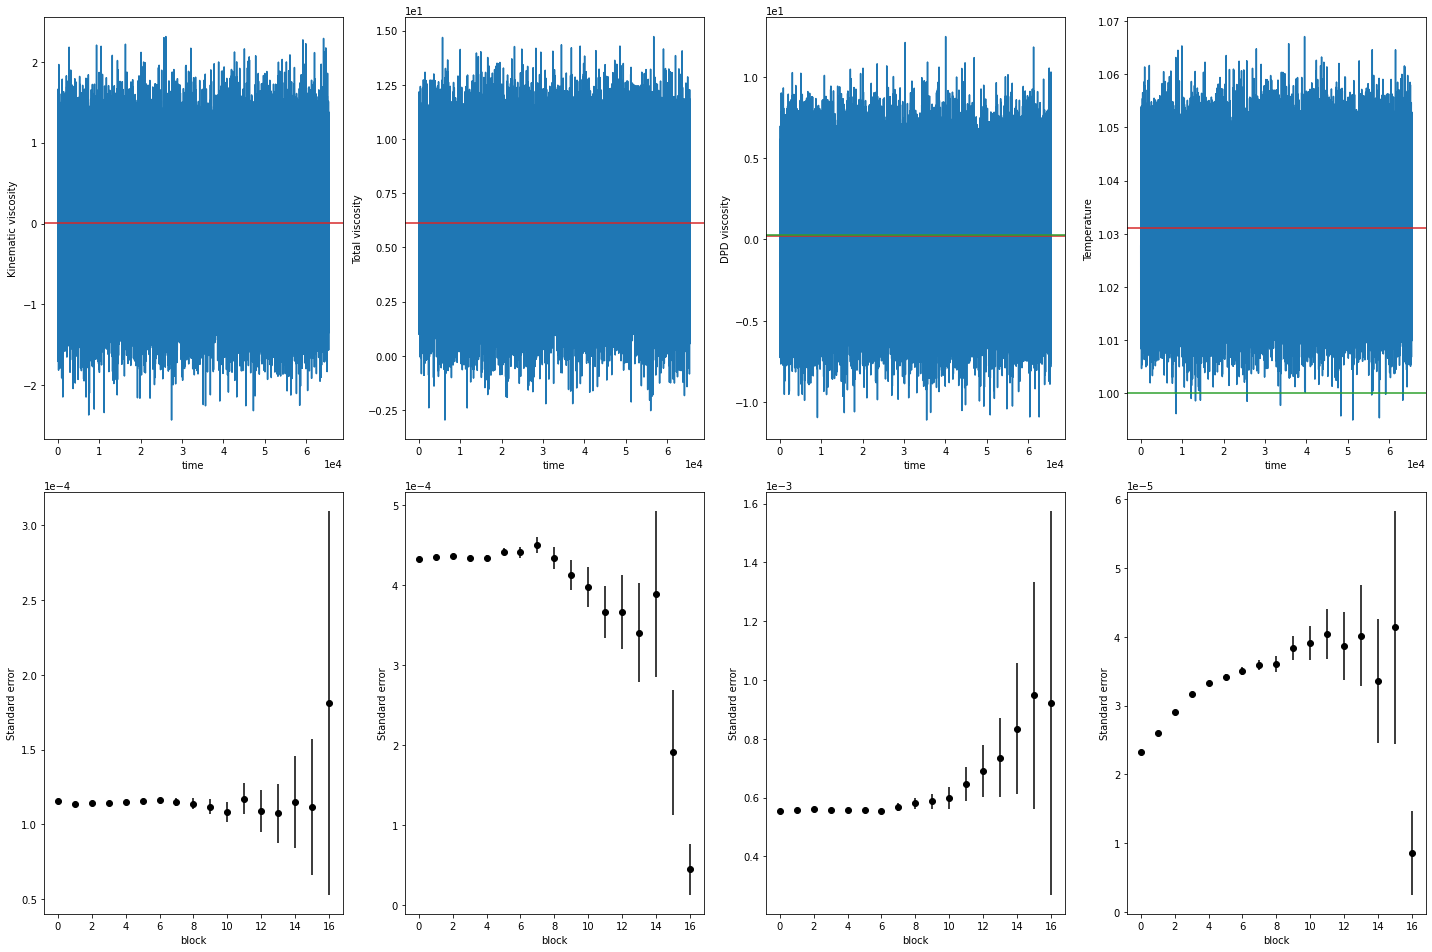

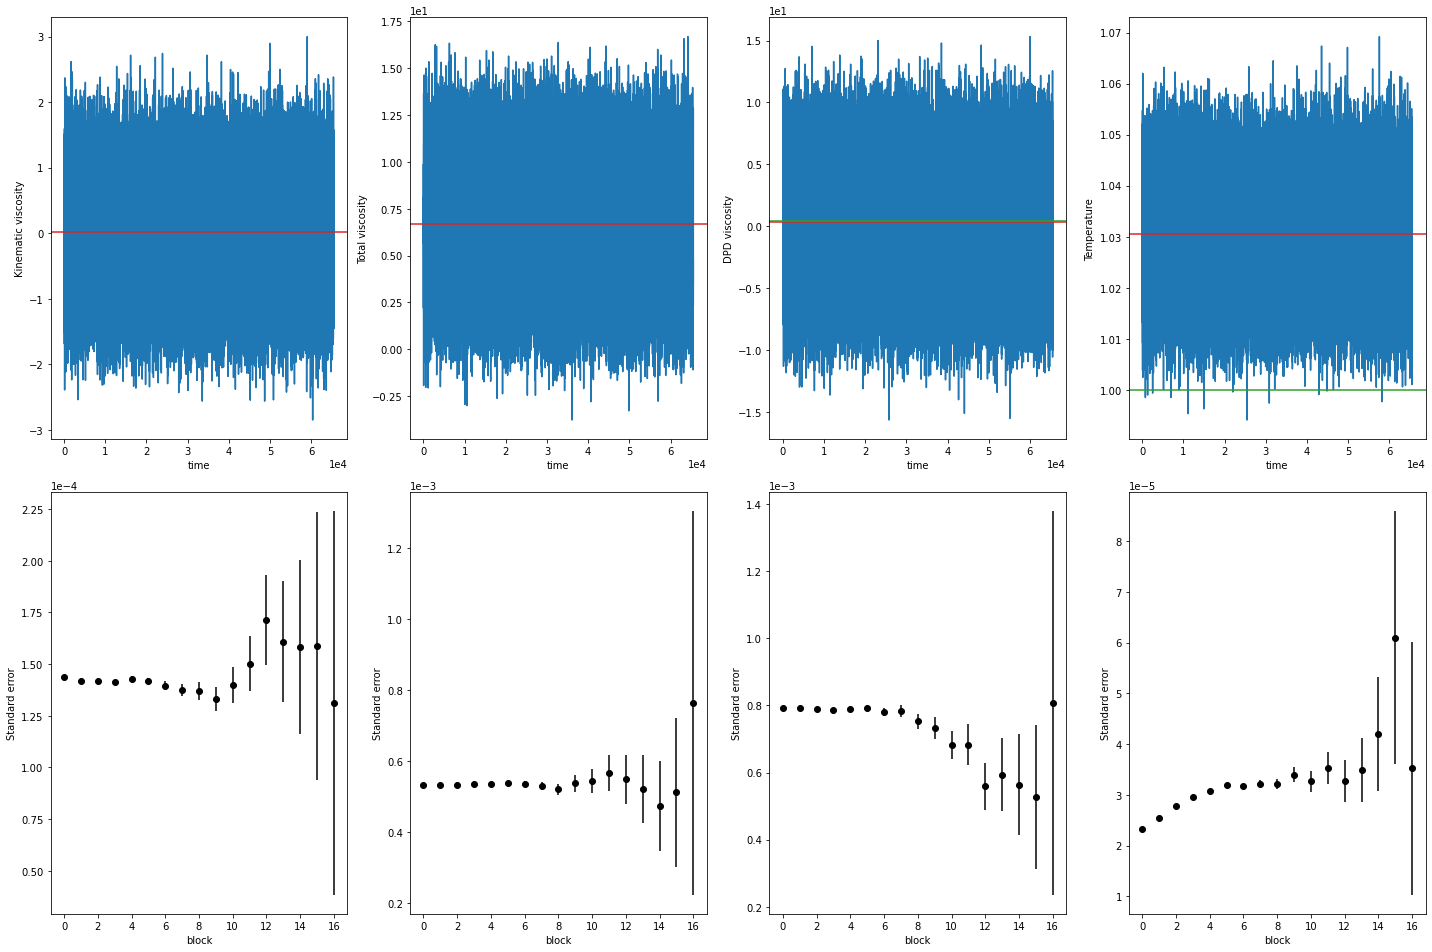

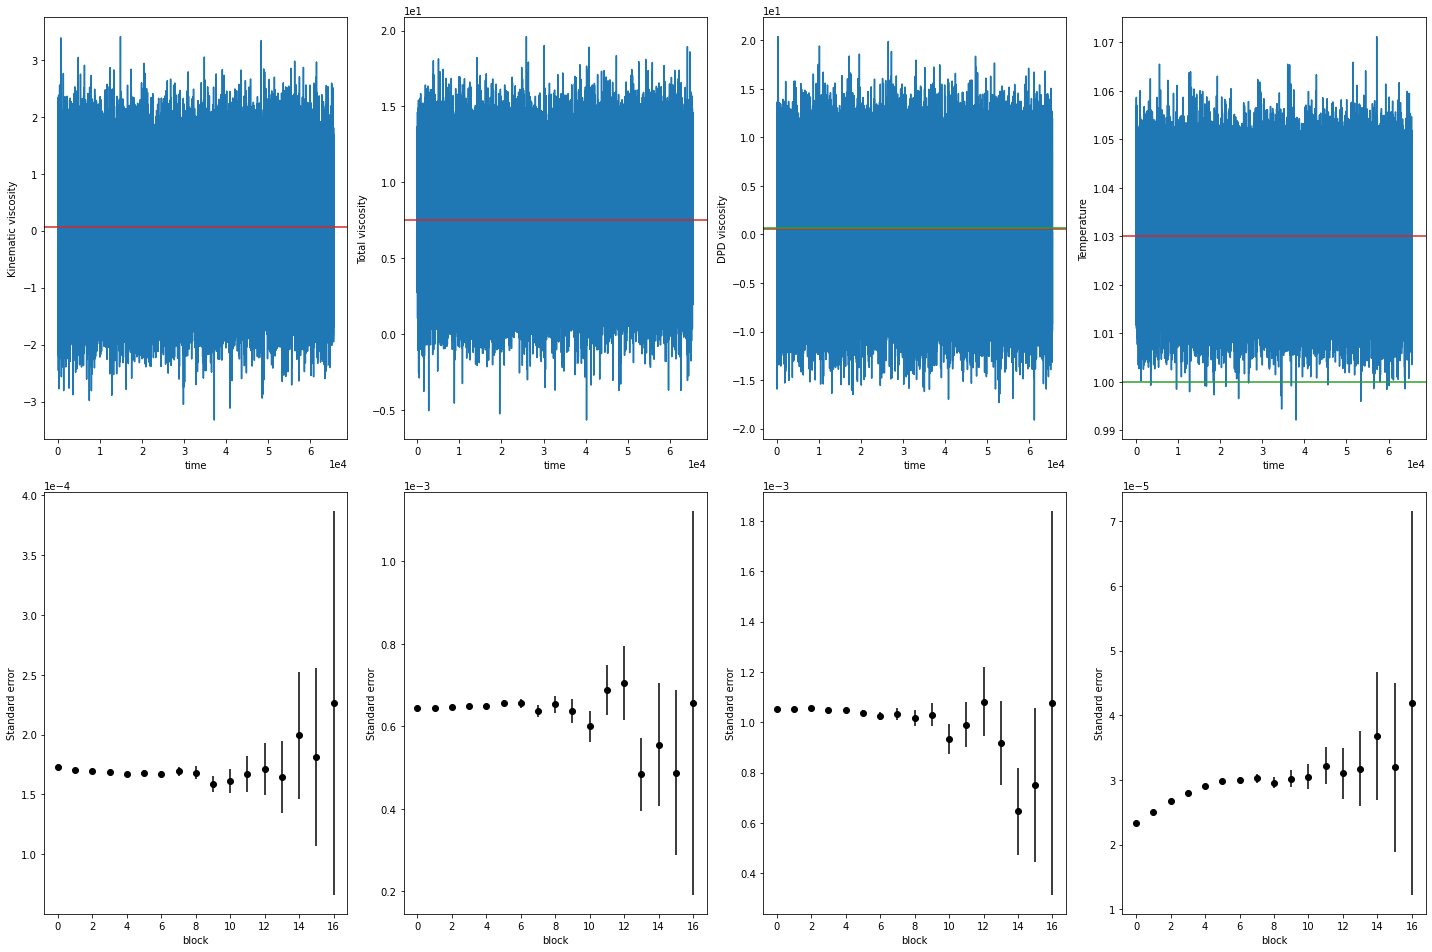

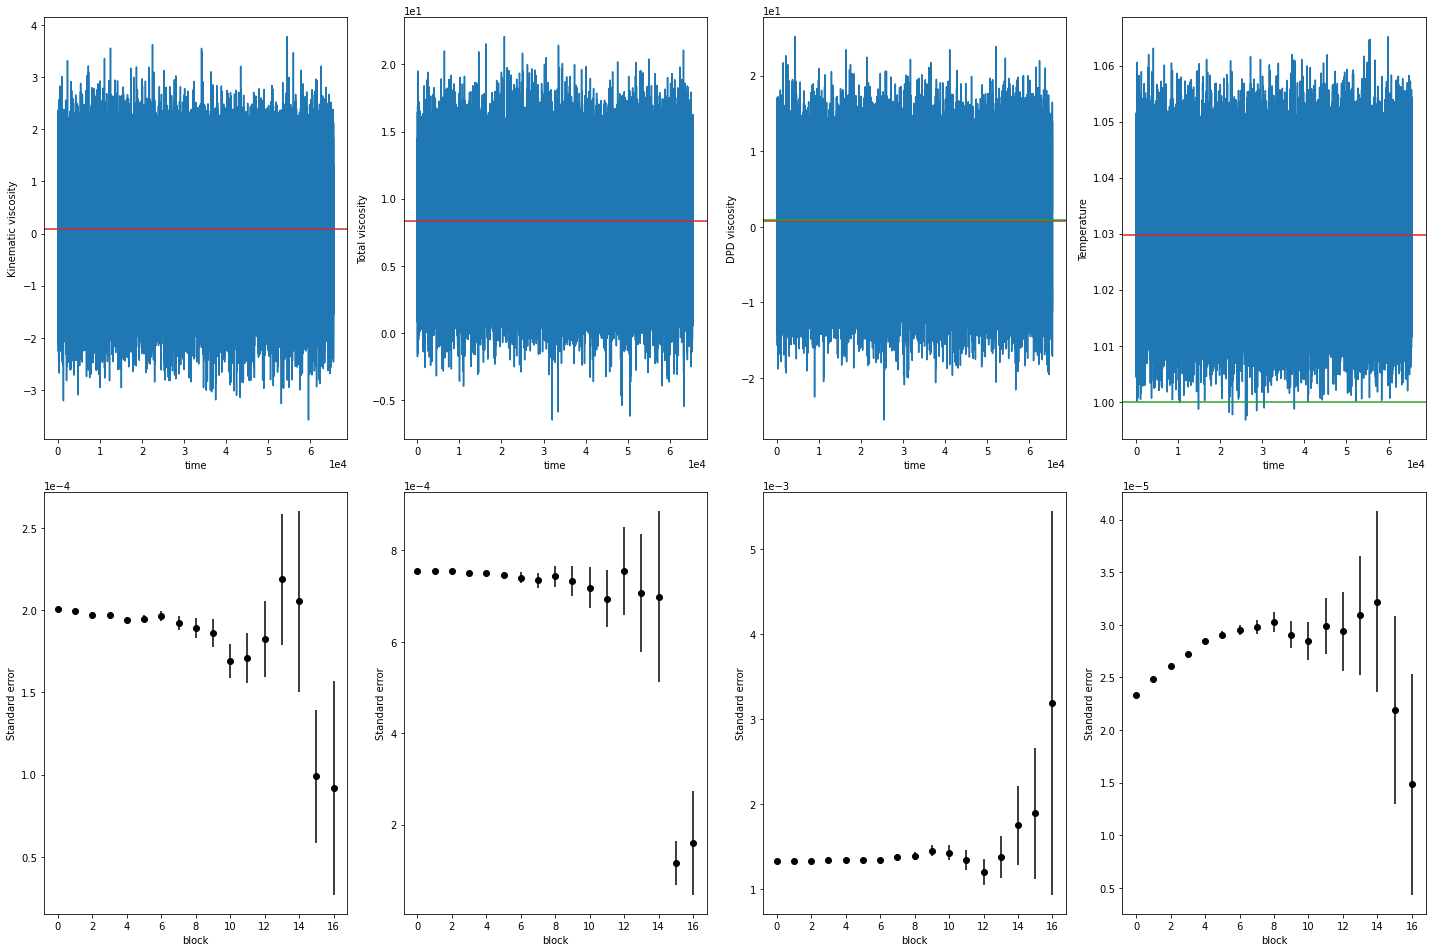

In [4]:
#visc_le = open('visc_le.txt', 'a')

cutoff = 200000
cutoff = 2**17
time = np.arange(0.0, cutoff*0.005*100, 0.005*100)
shear_vel = 1.0

for i in range(0,40):
    j = i+1
    
    with open('../parameter_files/params_dpd.csv') as f:
        line = f.readlines()[j]
        line = line.split(',')
        
    rho, a_ij = float(line[0]), float(line[1])
    print(rho,a_ij)
    
    l = (10000/rho) ** (1/3)
    vol = 10000/rho
    gamma_dot = shear_vel/l
    eta_theo = 2*np.pi*4.5*rho**2/1575
    
    kin_stress = -1.0 * np.genfromtxt(
        data_dir + 'le_visc_' + job_name + '[' + str(j) +']/kin_stress.txt', delimiter=';')[-cutoff:]
    
    old_stress = -1.0 * np.genfromtxt(
        data_dir + 'le_visc_' + job_name + '[' + str(j) +']/old_stress.txt', delimiter=';')[-cutoff:]
    
    dpd_stress = -1.0 * np.genfromtxt(
        data_dir + 'le_visc_' + job_name + '[' + str(j) +']/dpd_stress.txt', delimiter=';')[-cutoff:,1]
    
    temp = np.genfromtxt(
        data_dir + 'le_visc_' + job_name + '[' + str(j) +']/temp.txt', delimiter=';')[-cutoff:] / (10000 * 3/2)
    
    plt.figure(figsize=(20,20*2/3))
    
    # Kinetic viscosity
    
    ax5 = plt.subplot(245)
    reblock_data = pyblock.blocking.reblock(kin_stress)
    for reblock_iter in reblock_data:
        ax5.errorbar(reblock_iter[0], reblock_iter[4], yerr=reblock_iter[5], fmt='ko')
    ax5.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax5.set_ylabel('Standard error')
    ax5.set_xlabel('block')
        
    opt = pyblock.blocking.find_optimal_block(len(kin_stress), reblock_data)
    mean_kin_visc = reblock_data[opt[0]][2] / gamma_dot
    std_kin_visc = reblock_data[opt[0]][4] / gamma_dot
        
    ax1 = plt.subplot(241)
    ax1.plot(time, kin_stress/gamma_dot)
    ax1.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
    ax1.axhline(y=mean_kin_visc, color='tab:red')
    ax1.set_ylabel('Kinematic viscosity')
    ax1.set_xlabel('time')

    # Old viscosity
  
    ax6 = plt.subplot(246)
    reblock_data = pyblock.blocking.reblock(old_stress)
    for reblock_iter in reblock_data:
        ax6.errorbar(reblock_iter[0], reblock_iter[4], yerr=reblock_iter[5], fmt='ko')
    ax6.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax6.set_ylabel('Standard error')
    ax6.set_xlabel('block')
        
    opt = pyblock.blocking.find_optimal_block(len(old_stress), reblock_data)
    mean_old_visc = reblock_data[opt[0]][2] / gamma_dot
    std_old_visc = reblock_data[opt[0]][4] / gamma_dot

    ax2 = plt.subplot(242)
    ax2.plot(time, old_stress/gamma_dot)
    ax2.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
    ax2.axhline(y=mean_old_visc, color='tab:red')
    ax2.set_ylabel('Total viscosity')
    ax2.set_xlabel('time')
                         
    # DPD viscosity    

    ax7 = plt.subplot(247)
    reblock_data = pyblock.blocking.reblock(dpd_stress)
    for reblock_iter in reblock_data:
        #print(reblock_iter)
        ax7.errorbar(reblock_iter[0], reblock_iter[4], yerr=reblock_iter[5], fmt='ko')
    ax7.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax7.set_ylabel('Standard error')
    ax7.set_xlabel('block')
        
    opt = pyblock.blocking.find_optimal_block(len(dpd_stress), reblock_data)
    mean_dpd_visc = reblock_data[opt[0]][2] / gamma_dot
    std_dpd_visc = reblock_data[opt[0]][4] / gamma_dot    
    
    
    ax3 = plt.subplot(243)
    ax3.plot(time, dpd_stress/gamma_dot)
    ax3.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
    ax3.axhline(y=mean_dpd_visc, color='tab:red')
    ax3.axhline(y=eta_theo, color='tab:green')
    ax3.set_ylabel('DPD viscosity')
    ax3.set_xlabel('time')

    
    # Temperature 

    ax8 = plt.subplot(248)
    reblock_data = pyblock.blocking.reblock(temp)
    for reblock_iter in reblock_data:
        #print(reblock_iter)
        ax8.errorbar(reblock_iter[0], reblock_iter[4], yerr=reblock_iter[5], fmt='ko')
    ax8.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax8.set_ylabel('Standard error')
    ax8.set_xlabel('block')
        
    opt = pyblock.blocking.find_optimal_block(len(temp), reblock_data)
    mean_temp = reblock_data[opt[0]][2]
    std_temp = reblock_data[opt[0]][4]    
    
    ax4 = plt.subplot(244)
    ax4.plot(time, temp)
    ax4.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
    ax4.axhline(y=mean_temp, color='tab:red')
    ax4.axhline(y=1.0, color='tab:green')
    ax4.set_ylabel('Temperature')
    ax4.set_xlabel('time')
    
    plt.tight_layout()
    
    print("Temperature:", mean_temp, '+/-', std_temp)
    print("Predicted dissipative viscosity:", eta_theo)
    print("Dissipative viscosity:", mean_dpd_visc, '+/-', std_dpd_visc)
    print("Kinetic viscosity:", mean_kin_visc, '+/-', std_kin_visc)
    print("Total viscosity:", mean_old_visc, '+/-', std_old_visc)
    print("\n")
    
    #visc_le.write('{}; {}; {}; {}; {}; {}; {}; {}; {}; {} \n'.format(rho, a_ij, 
    #                                                                 mean_kin_visc, std_kin_visc, 
    #                                                                 mean_old_visc, std_old_visc, 
    #                                                                 mean_dpd_visc, std_dpd_visc,
    #                                                                 mean_temp, std_temp
    #                                                                ))

#visc_le.close()